In [254]:
!pip install arch

In [728]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import ipywidgets as widgets
from IPython.display import display

In [2814]:
w = widgets.Dropdown(
    options=['SELECT','AAPL', 'ABUS', 'ARDS', 'BABA','BFRI', 
             'FB', 'GME', 'MCD','PFE', 'PLUG', 
             'QCOM', 'SENS','TSLA', 'TWTR', 'UUUU'],
    value='SELECT',
    description ='Stock name:',

)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("You have selected %s" % change['new'])

w.observe(on_change)

display(w)


Dropdown(description='Stock name:', options=('SELECT', 'AAPL', 'ABUS', 'ARDS', 'BABA', 'BFRI', 'FB', 'GME', 'M…

You have selected UUUU


In [2815]:
if(w.value == 'AAPL'):
  df = pd.read_csv('/content/Final_AAPL.csv')
if(w.value == 'ABUS'):
  df = pd.read_csv('/content/Final_ABUS.csv')
if(w.value == 'ARDS'):
  df = pd.read_csv('/content/Final_ARDS.csv')
if(w.value == 'BABA'):
  df = pd.read_csv('/content/Final_BABA.csv')
if(w.value == 'BFRI'):
  df = pd.read_csv('/content/Final_BFRI.csv')
if(w.value == 'FB'):
  df = pd.read_csv('/content/Final_FB.csv')
if(w.value == 'GME'):
  df = pd.read_csv('/content/Final_GME.csv')
if(w.value == 'MCD'):
  df = pd.read_csv('/content/Final_MCD.csv')
if(w.value == 'PFE'):
  df = pd.read_csv('/content/Final_PFE.csv')
if(w.value == 'PLUG'):
  df = pd.read_csv('/content/Final_PLUG.csv')
if(w.value == 'QCOM'):
  df = pd.read_csv('/content/Final_QCOM.csv')
if(w.value == 'SENS'):
  df = pd.read_csv('/content/Final_SENS.csv')
if(w.value == 'TSLA'):
  df = pd.read_csv('/content/Final_TSLA.csv')
if(w.value == 'TWTR'):
  df = pd.read_csv('/content/Final_TWTR.csv')
if(w.value == 'UUUU'):
  df = pd.read_csv('/content/Final_UUUU.csv')

In [2816]:
pd.set_option('display.max_colwidth', None)

In [2817]:
df['Date'] = df['Date'].astype("datetime64[ns]")

In [2818]:
del df['Unnamed: 0']

In [2819]:
df.head(5)

Date  Open  High   Low  Close  ...  C    E  A    N  Real_or_Fake_tweet
0 2020-04-21  1.70  1.70  1.50   1.56  ...  0   14  0   14                  14
1 2020-04-22  1.60  1.93  1.57   1.90  ...  0   69  0   69                  69
2 2020-04-23  2.10  2.35  1.76   1.91  ...  0  128  0  128                 128
3 2020-04-24  2.01  2.01  1.81   1.86  ...  0   45  0   45                  45
4 2020-04-27  1.91  1.93  1.78   1.86  ...  0   15  0   15                  15

[5 rows x 52 columns]

In [2820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       423 non-null    datetime64[ns]
 1   Open                       423 non-null    float64       
 2   High                       423 non-null    float64       
 3   Low                        423 non-null    float64       
 4   Close                      423 non-null    float64       
 5   Adj Close                  423 non-null    float64       
 6   Volume                     423 non-null    int64         
 7   Return                     423 non-null    float64       
 8   Beta                       423 non-null    float64       
 9   Variance                   423 non-null    float64       
 10  AvgTrueRange               423 non-null    float64       
 11  Upperband                  423 non-null    float64       
 12  Lowerban

In [2821]:
df.shape

(423, 52)

In [2822]:
sns.set(font_scale=0.8)

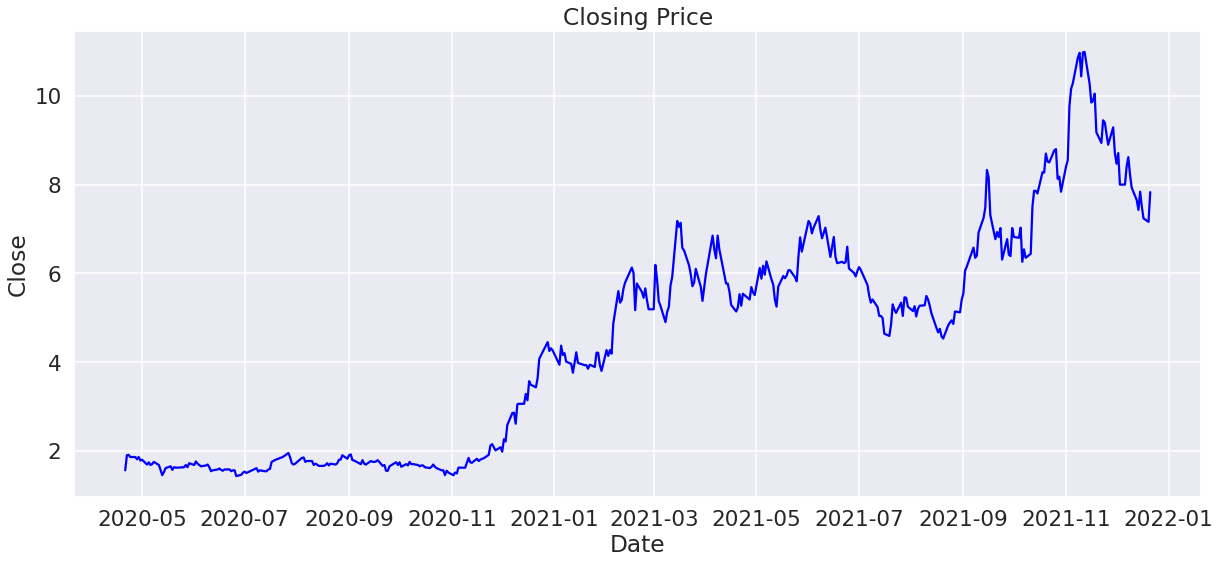

In [2823]:
# CHANGE CONTEXT TO poster TO INCREASE FONT SIZES
sns.set_context("talk", font_scale=1.3)

# PLOT OUT BTC-USE'S CLOSING PRICES SINCE 2014
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,8))
    sns.lineplot(x=df.Date, y=df.Close, color='blue')
    ax.set_title('Closing Price')    

In [2824]:
# CALCULATE PRICE RETURNS AS DAILY PERCENTAGE CHANGE USING pct_change()
df['returns'] = 100 * df.Close.pct_change().dropna()

In [2825]:
# CALCULATE LOG RETURNS BASED ON ABOVE FORMULA
df['log_returns'] = np.log(df.Close/df.Close.shift(1))

In [2826]:
df.head()

Date  Open  High   Low  ...    N  Real_or_Fake_tweet    returns  log_returns
0 2020-04-21  1.70  1.70  1.50  ...   14                  14        NaN          NaN
1 2020-04-22  1.60  1.93  1.57  ...   69                  69  21.794875     0.197168
2 2020-04-23  2.10  2.35  1.76  ...  128                 128   0.526315     0.005249
3 2020-04-24  2.01  2.01  1.81  ...   45                  45  -2.617799    -0.026527
4 2020-04-27  1.91  1.93  1.78  ...   15                  15   0.000000     0.000000

[5 rows x 54 columns]

In [2827]:
# DROPPING THE 1ST ROW OF DATA 
# BECAUSE I SHIFTED IT FORWARD TO CALCULATE RETURNS/LOG RETURNS
df.dropna(inplace=True)

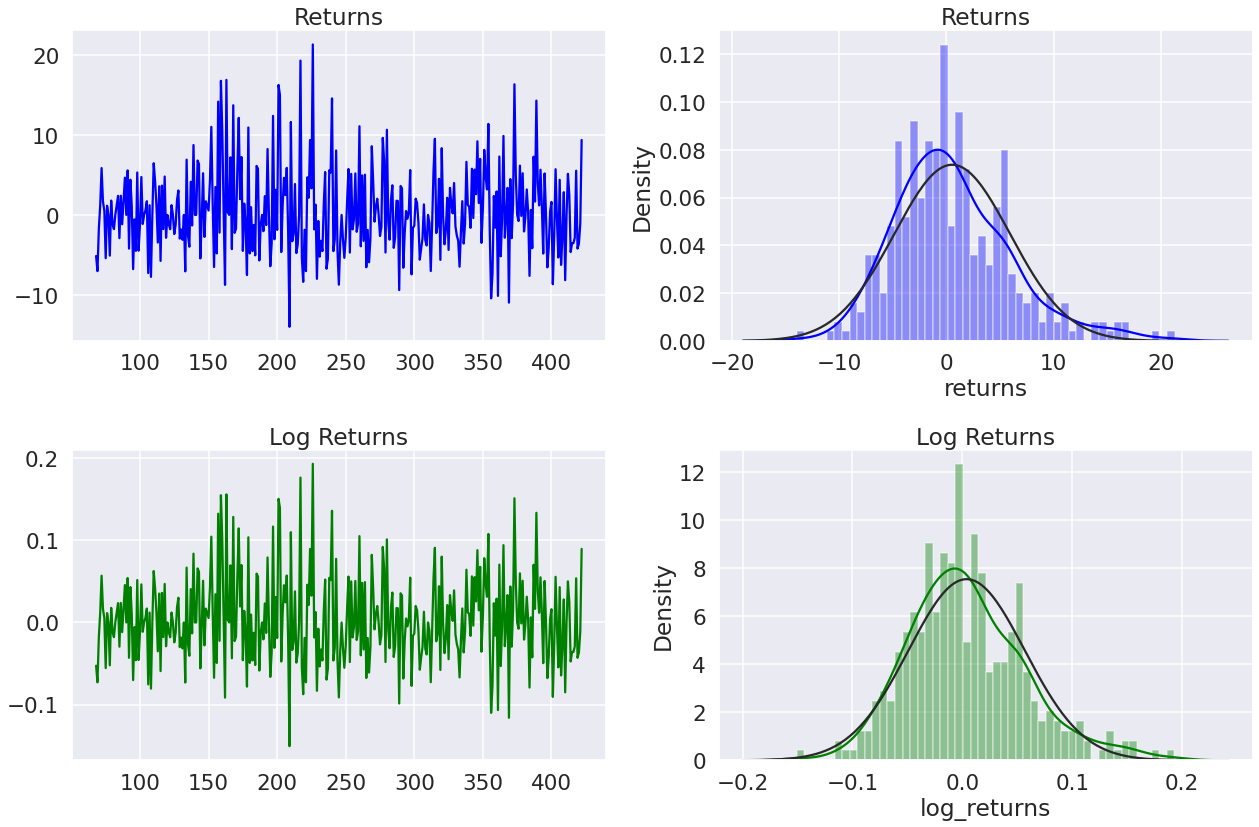

In [2828]:
# PLOT DISTRIBUTION PLOTS OF RETURNS & LOG RETURNS
# AND VISUALLY COMPARE THEM WITH THE STANDARD NORMAL DISTRIBUTION
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(df.returns, color='blue')
    axes[0][0].set_title('Returns')

    sns.distplot(df.returns, norm_hist=True, fit=stats.norm, color='blue',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Returns')

    axes[1][0].plot(df.log_returns, color='green')
    axes[1][0].set_title('Log Returns')

    sns.distplot(df.log_returns, norm_hist=True, fit=stats.norm, color='green',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Log Returns')
    plt.tight_layout()
    fig.show();

In [2829]:
# CREATE A FUNCTION THAT CALCULATE REALIZED VOLATILITY
# FROM SAILY LOG RETURNS
def realized_volatility_daily(series_log_return):
    """
    Get the daily realized volatility which is calculated as the square root
    of sum of squares of log returns within a specific window interval 
    """
    n = len(series_log_return)
    return np.sqrt(np.sum(series_log_return**2)/(n - 1))

In [2830]:
intervals = [7, 30, 60, 180, 365]
vols_df = {}

# ITERATE OVER intervals LIST
for i in intervals:
    # GET DAILY LOG RETURNS USING THAT INTERVAL
    vols = df.log_returns.rolling(window=i)\
                         .apply(realized_volatility_daily).values

    vols_df[i] = vols

# CONVERT vols_df FROM DICTIONARY TO PANDAS DATAFRAME
vols_df = pd.DataFrame(vols_df, columns=intervals, index=df.index)

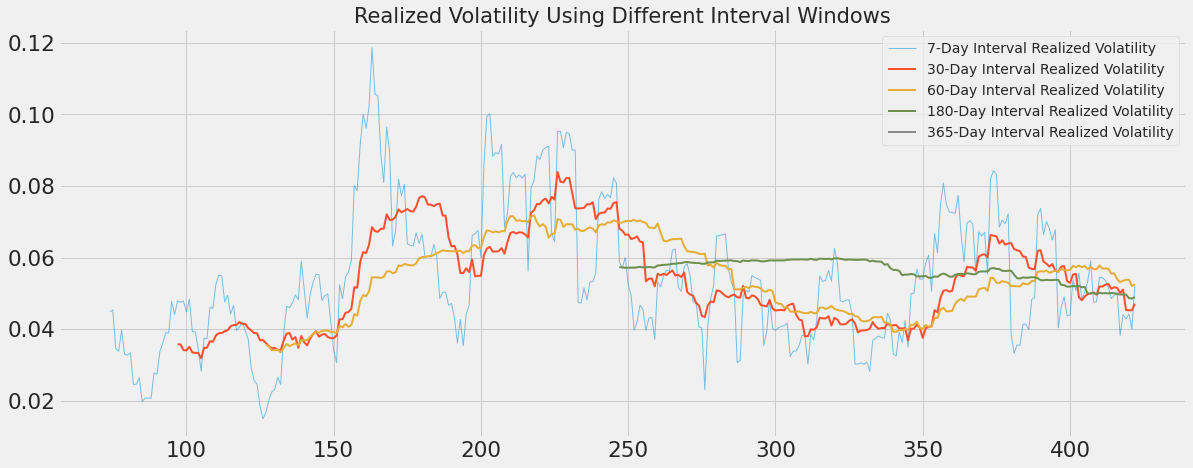

In [2831]:
# CHANGING MATPLOTLIB STYLE
plt.style.use(['fivethirtyeight'])

fig, ax = plt.subplots(figsize=(18,7))

for i in intervals:
    if i == 7:
        alpha = 0.5
        lw = 1
    else:
        alpha = 1.0
        lw = 2
    ax.plot(vols_df[i], label=f'{i}-Day Interval Realized Volatility', 
            alpha=alpha, lw=lw)

ax.set_title('Realized Volatility Using Different Interval Windows', fontsize=21)

plt.legend(loc='best', prop={'size': 14})
plt.show();

In [2832]:
INTERVAL_WINDOW = 30
n_future = 7

# GET BACKWARD LOOKING REALIZED VOLATILITY
df['vol_current'] = df.log_returns.rolling(window=INTERVAL_WINDOW)\
                                   .apply(realized_volatility_daily)

# GET FORWARD LOOKING REALIZED VOLATILITY 
df['vol_future'] = df.log_returns.shift(-n_future)\
                                 .rolling(window=INTERVAL_WINDOW)\
                                 .apply(realized_volatility_daily)

In [2833]:
df.describe()

Open        High         Low  ...  log_returns  vol_current  vol_future
count  355.000000  355.000000  355.000000  ...   355.000000   326.000000  319.000000
mean     5.001296    5.187099    4.795099  ...     0.003916     0.053330    0.053742
std      2.408832    2.499173    2.309760  ...     0.053035     0.013068    0.012907
min      1.450000    1.530000    1.420000  ...    -0.150552     0.031915    0.031915
25%      2.170000    2.255000    2.050000  ...    -0.031467     0.041293    0.041576
50%      5.360000    5.540000    5.160000  ...     0.000000     0.051194    0.051734
75%      6.495000    6.815000    6.255000  ...     0.036124     0.063612    0.063958
max     11.100000   11.390000   10.680000  ...     0.192963     0.083973    0.083973

[8 rows x 55 columns]

In [2834]:
df.rename(columns = {'Real_or_Fake_tweet': 'Fake_news'}, inplace = True)

In [2835]:
df = df.fillna(df.median())

In [2836]:
df.isna().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Adj Close                    0
Volume                       0
Return                       0
Beta                         0
Variance                     0
AvgTrueRange                 0
Upperband                    0
Lowerband                    0
Middleband                   0
APO                          0
NATR                         0
TRANGE                       0
DMI                          0
MACD                         0
MACDSIGNAL                   0
MACDHIST                     0
MOM                          0
PPO                          0
ROCP                         0
RSI                          0
TRIX                         0
ULTOSC                       0
SLOWK                        0
SLOWD                        0
AD                           0
ADOSC                        0
OBV                          0
Upward_m

In [2837]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 68 to 422
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       355 non-null    datetime64[ns]
 1   Open                       355 non-null    float64       
 2   High                       355 non-null    float64       
 3   Low                        355 non-null    float64       
 4   Close                      355 non-null    float64       
 5   Adj Close                  355 non-null    float64       
 6   Volume                     355 non-null    int64         
 7   Return                     355 non-null    float64       
 8   Beta                       355 non-null    float64       
 9   Variance                   355 non-null    float64       
 10  AvgTrueRange               355 non-null    float64       
 11  Upperband                  355 non-null    float64       
 12  Lowerba

In [2838]:
df.shape

(355, 56)

In [2839]:
df=df.dropna()

In [2840]:
df.dtypes

Date                         datetime64[ns]
Open                                float64
High                                float64
Low                                 float64
Close                               float64
Adj Close                           float64
Volume                                int64
Return                              float64
Beta                                float64
Variance                            float64
AvgTrueRange                        float64
Upperband                           float64
Lowerband                           float64
Middleband                          float64
APO                                 float64
NATR                                float64
TRANGE                              float64
DMI                                 float64
MACD                                float64
MACDSIGNAL                          float64
MACDHIST                            float64
MOM                                 float64
PPO                             

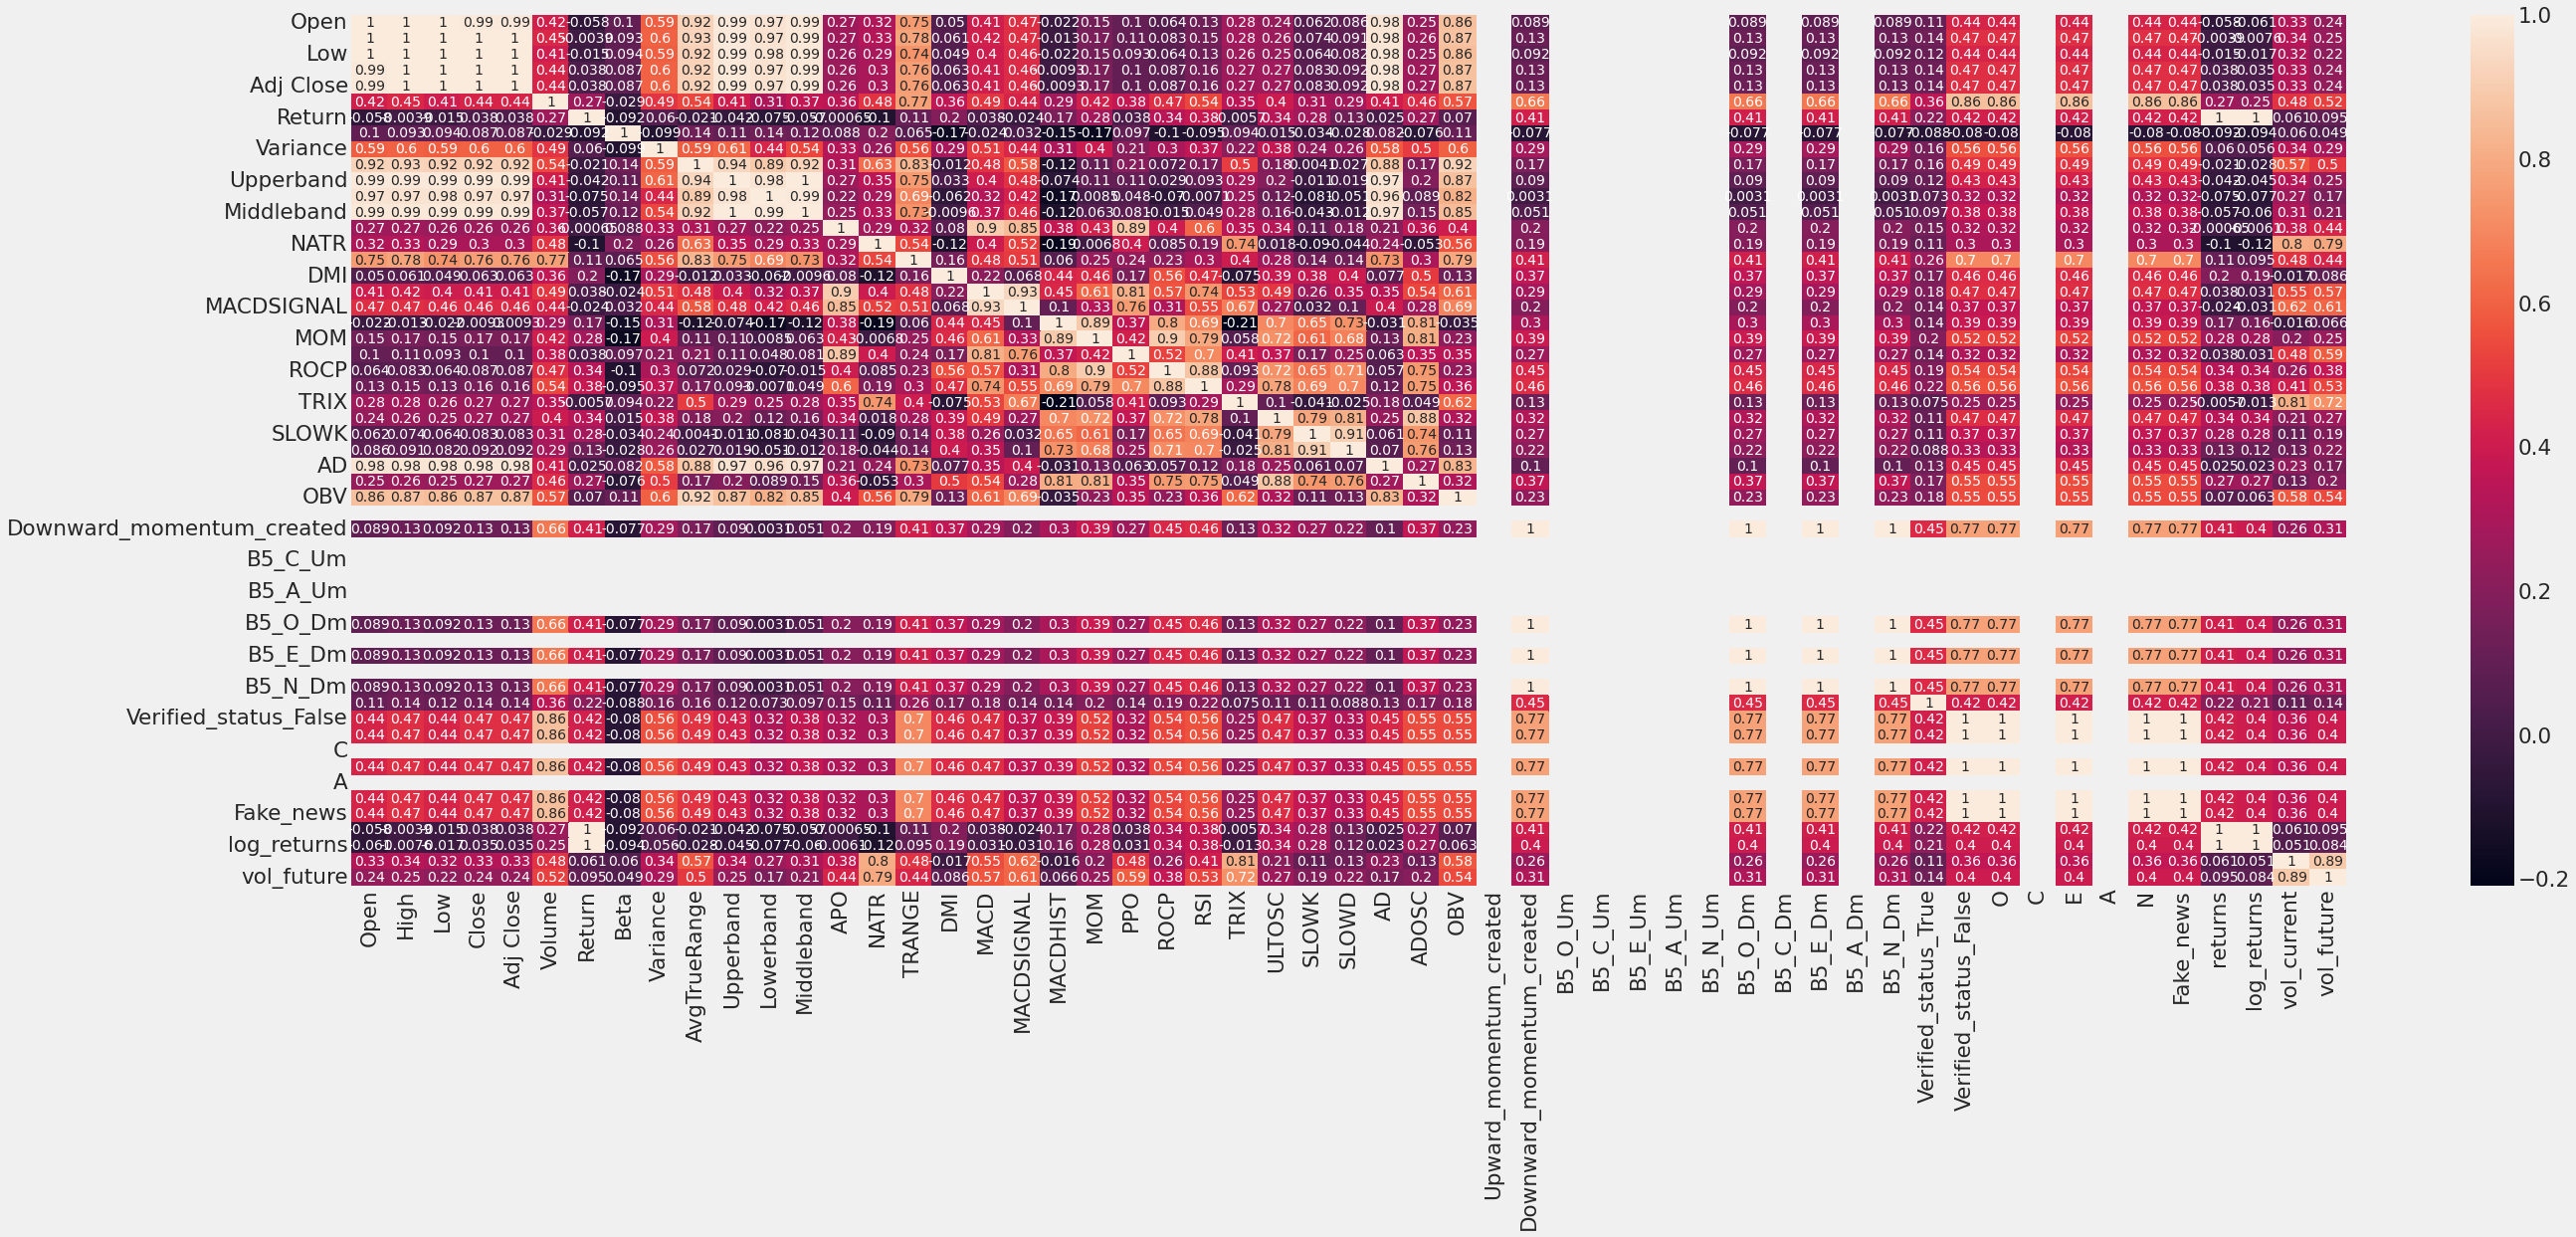

In [2841]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40,15))
sns.heatmap(df.corr(),annot=True)

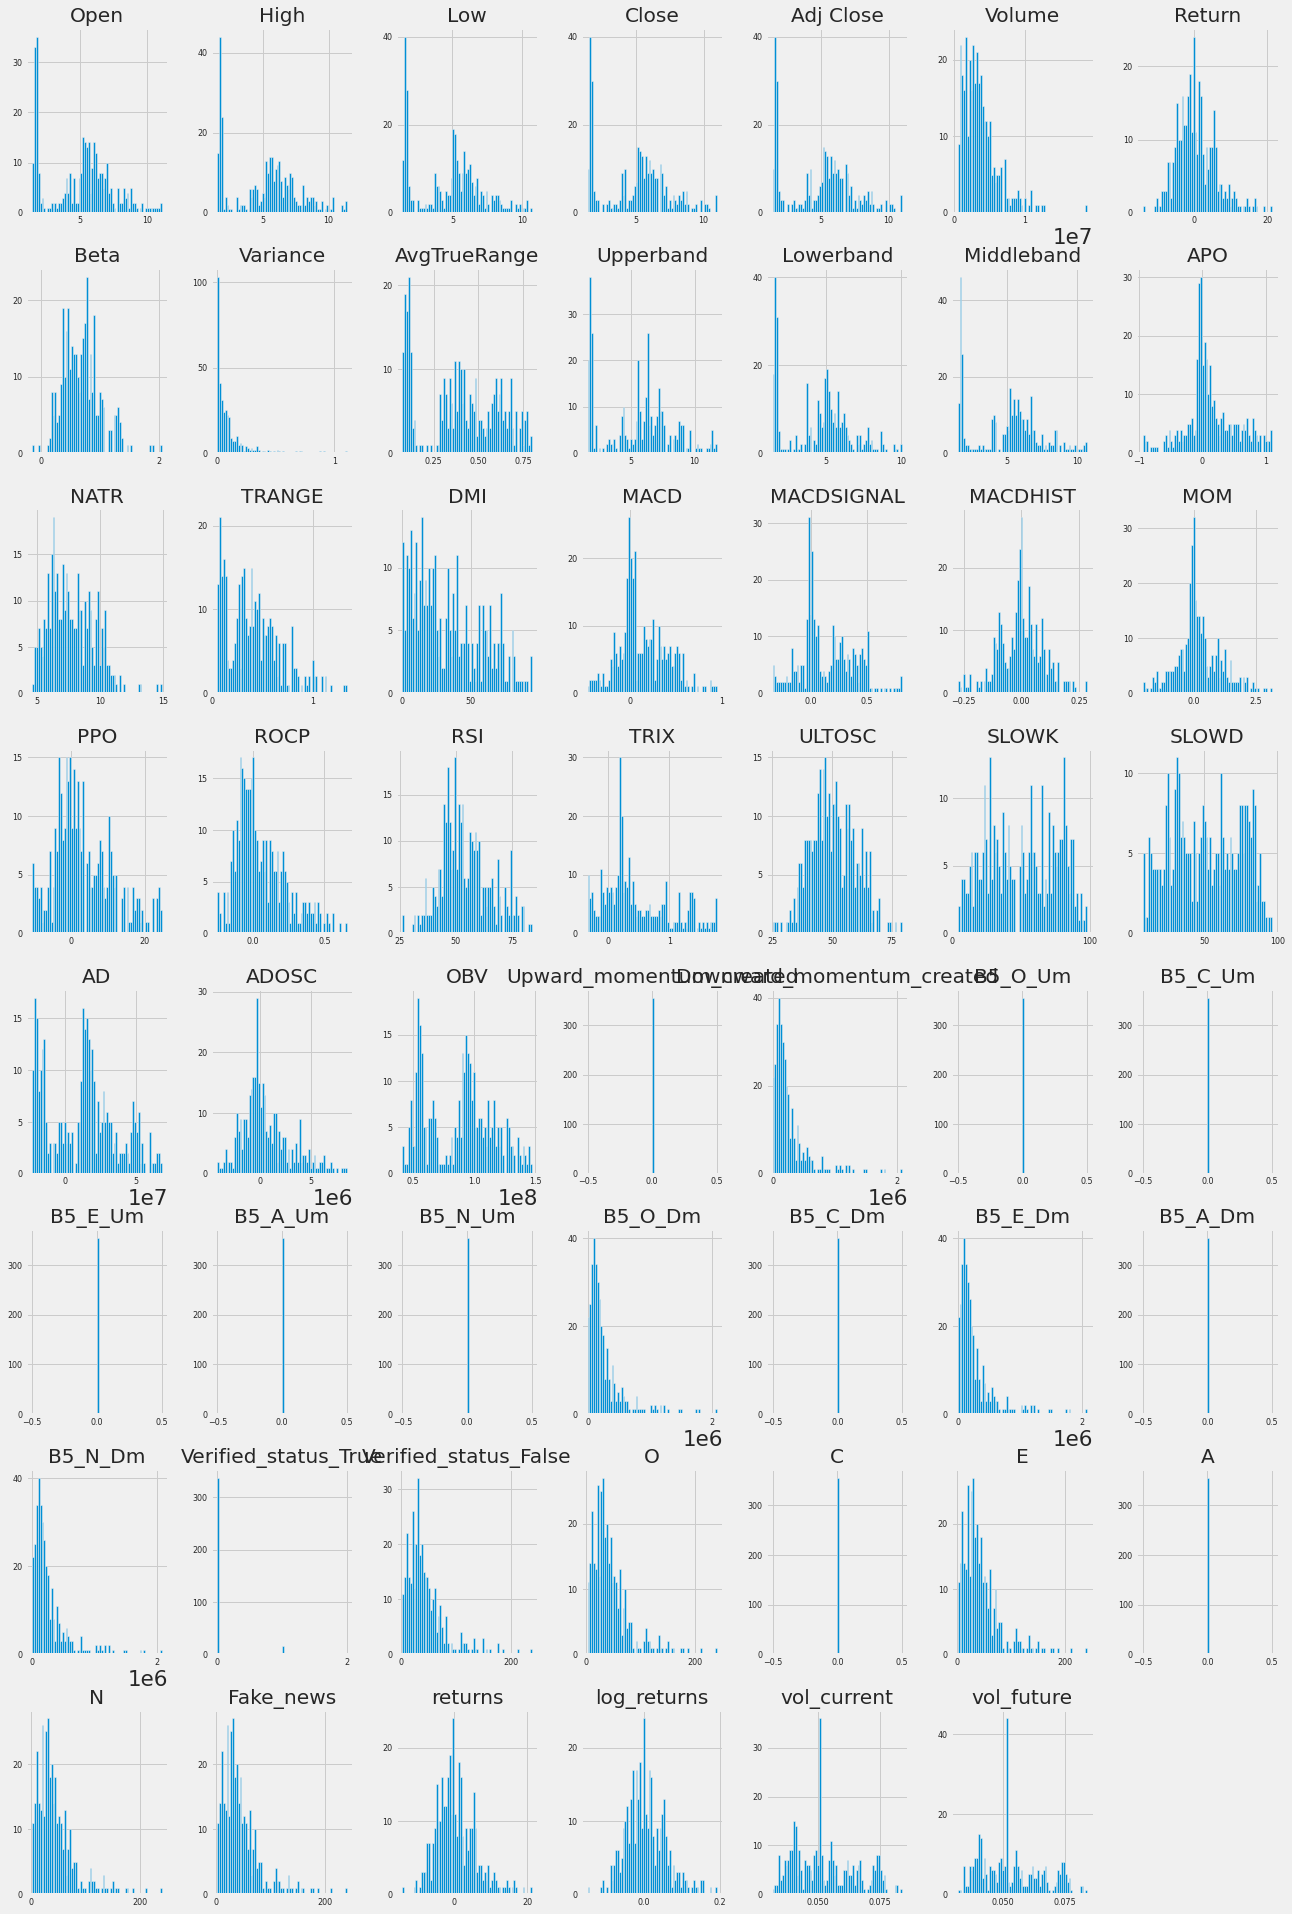

In [2842]:
df.hist(figsize=(20, 32), bins=70, xlabelsize=8, ylabelsize=8);

In [2843]:
df_corr = df.corr()['AvgTrueRange'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with AvgTrueRange:\n{}".format(len(golden_features_list), golden_features_list))

There are 18 strongly correlated values with AvgTrueRange:
AvgTrueRange    1.000000
Upperband       0.936405
High            0.929068
OBV             0.923125
Middleband      0.923111
Open            0.922536
Adj Close       0.920110
Close           0.920110
Low             0.915057
Lowerband       0.894421
AD              0.883944
TRANGE          0.833429
NATR            0.628781
Variance        0.592964
MACDSIGNAL      0.579057
vol_current     0.572316
Volume          0.536846
TRIX            0.504563
Name: AvgTrueRange, dtype: float64


In [2844]:
df_AvgTrueRange = golden_features_list.to_frame().reset_index()

In [2845]:
df_corr = df.corr()['NATR'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with NATR :\n{}".format(len(golden_features_list), golden_features_list))

There are 8 strongly correlated values with NATR :
NATR            1.000000
vol_current     0.802117
vol_future      0.788182
TRIX            0.743856
AvgTrueRange    0.628781
OBV             0.563721
TRANGE          0.536828
MACDSIGNAL      0.521450
Name: NATR, dtype: float64


In [2846]:
df_NATR = golden_features_list.to_frame().reset_index()

In [2847]:
df_corr = df.corr()['TRANGE'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with TRANGE:\n{}".format(len(golden_features_list), golden_features_list))

There are 21 strongly correlated values with TRANGE:
TRANGE                   1.000000
AvgTrueRange             0.833429
OBV                      0.788171
High                     0.778333
Volume                   0.766161
Close                    0.760791
Adj Close                0.760791
Upperband                0.754188
Open                     0.750791
Low                      0.735336
AD                       0.731219
Middleband               0.730668
Verified_status_False    0.698532
N                        0.698285
O                        0.698285
E                        0.698285
Fake_news                0.698285
Lowerband                0.691804
Variance                 0.556942
NATR                     0.536828
MACDSIGNAL               0.507934
Name: TRANGE, dtype: float64


In [2848]:
df_TRANGE = golden_features_list.to_frame().reset_index()

In [2849]:
df_corr = df.corr()['O'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Openness:\n{}".format(len(golden_features_list), golden_features_list))

There are 17 strongly correlated values with Openness:
Fake_news                    1.000000
N                            1.000000
E                            1.000000
O                            1.000000
Verified_status_False        0.999976
Volume                       0.861133
B5_E_Dm                      0.772291
B5_O_Dm                      0.772291
B5_N_Dm                      0.772291
Downward_momentum_created    0.772291
TRANGE                       0.698285
RSI                          0.564619
Variance                     0.556972
ADOSC                        0.548940
OBV                          0.545842
ROCP                         0.535579
MOM                          0.523893
Name: O, dtype: float64


In [2850]:
df_O = golden_features_list.to_frame().reset_index()

In [2851]:
df_corr = df.corr()['C'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with conscientiousness:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with conscientiousness:
Series([], Name: C, dtype: float64)


In [2852]:
df_C = golden_features_list.to_frame().reset_index()

In [2853]:
df_corr = df.corr()['E'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with conscientiousness:\n{}".format(len(golden_features_list), golden_features_list))

There are 17 strongly correlated values with conscientiousness:
Fake_news                    1.000000
N                            1.000000
E                            1.000000
O                            1.000000
Verified_status_False        0.999976
Volume                       0.861133
B5_E_Dm                      0.772291
B5_O_Dm                      0.772291
B5_N_Dm                      0.772291
Downward_momentum_created    0.772291
TRANGE                       0.698285
RSI                          0.564619
Variance                     0.556972
ADOSC                        0.548940
OBV                          0.545842
ROCP                         0.535579
MOM                          0.523893
Name: E, dtype: float64


In [2854]:
df_E = golden_features_list.to_frame().reset_index()

In [2855]:
df_corr = df.corr()['A'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with conscientiousness:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with conscientiousness:
Series([], Name: A, dtype: float64)


In [2856]:
df_A = golden_features_list.to_frame().reset_index()

In [2857]:
df_corr = df.corr()['N'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with conscientiousness:\n{}".format(len(golden_features_list), golden_features_list))

There are 17 strongly correlated values with conscientiousness:
Fake_news                    1.000000
N                            1.000000
E                            1.000000
O                            1.000000
Verified_status_False        0.999976
Volume                       0.861133
B5_E_Dm                      0.772291
B5_O_Dm                      0.772291
B5_N_Dm                      0.772291
Downward_momentum_created    0.772291
TRANGE                       0.698285
RSI                          0.564619
Variance                     0.556972
ADOSC                        0.548940
OBV                          0.545842
ROCP                         0.535579
MOM                          0.523893
Name: N, dtype: float64


In [2858]:
df_N = golden_features_list.to_frame().reset_index()

In [2859]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return',
       'Beta', 'Variance', 'AvgTrueRange', 'Upperband', 'Lowerband',
       'Middleband', 'APO', 'NATR', 'TRANGE', 'DMI', 'MACD', 'MACDSIGNAL',
       'MACDHIST', 'MOM', 'PPO', 'ROCP', 'RSI', 'TRIX', 'ULTOSC', 'SLOWK',
       'SLOWD', 'AD', 'ADOSC', 'OBV', 'Upward_momentum_created',
       'Downward_momentum_created', 'B5_O_Um', 'B5_C_Um', 'B5_E_Um', 'B5_A_Um',
       'B5_N_Um', 'B5_O_Dm', 'B5_C_Dm', 'B5_E_Dm', 'B5_A_Dm', 'B5_N_Dm',
       'Verified_status_True', 'Verified_status_False', 'O', 'C', 'E', 'A',
       'N', 'Fake_news', 'returns', 'log_returns', 'vol_current',
       'vol_future'],
      dtype='object')

In [2860]:
df_corr = df.corr()['B5_O_Um'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_O_Um:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_O_Um:
Series([], Name: B5_O_Um, dtype: float64)


In [2861]:
df_B5_O_Um = golden_features_list.to_frame().reset_index()

In [2862]:
df_corr = df.corr()['B5_C_Um'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_C_Um:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_C_Um:
Series([], Name: B5_C_Um, dtype: float64)


In [2863]:
df_B5_C_Um = golden_features_list.to_frame().reset_index()

In [2864]:
df_corr = df.corr()['B5_E_Um'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_E_Um:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_E_Um:
Series([], Name: B5_E_Um, dtype: float64)


In [2865]:
df_B5_E_Um = golden_features_list.to_frame().reset_index()

In [2866]:
df_corr = df.corr()['B5_A_Um'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_A_Um:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_A_Um:
Series([], Name: B5_A_Um, dtype: float64)


In [2867]:
df_B5_A_Um = golden_features_list.to_frame().reset_index()

In [2868]:
df_corr = df.corr()['B5_N_Um'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_N_Um:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_N_Um:
Series([], Name: B5_N_Um, dtype: float64)


In [2869]:
df_B5_N_Um = golden_features_list.to_frame().reset_index()

Downward momentum correlation


In [2870]:
df_corr = df.corr()['B5_O_Dm'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_O_Dm:\n{}".format(len(golden_features_list), golden_features_list))

There are 10 strongly correlated values with B5_O_Dm:
B5_N_Dm                      1.000000
B5_E_Dm                      1.000000
B5_O_Dm                      1.000000
Downward_momentum_created    1.000000
Fake_news                    0.772291
N                            0.772291
E                            0.772291
O                            0.772291
Verified_status_False        0.771322
Volume                       0.655986
Name: B5_O_Dm, dtype: float64


In [2871]:
df_B5_O_Dm = golden_features_list.to_frame().reset_index()

In [2872]:
df_corr = df.corr()['B5_C_Dm'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_C_Dm:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_C_Dm:
Series([], Name: B5_C_Dm, dtype: float64)


In [2873]:
df_B5_C_Dm = golden_features_list.to_frame().reset_index()

In [2874]:
df_corr = df.corr()['B5_E_Dm'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_E_Dm:\n{}".format(len(golden_features_list), golden_features_list))

There are 10 strongly correlated values with B5_E_Dm:
B5_N_Dm                      1.000000
B5_E_Dm                      1.000000
B5_O_Dm                      1.000000
Downward_momentum_created    1.000000
Fake_news                    0.772291
N                            0.772291
E                            0.772291
O                            0.772291
Verified_status_False        0.771322
Volume                       0.655986
Name: B5_E_Dm, dtype: float64


In [2875]:
df_B5_E_Dm = golden_features_list.to_frame().reset_index()

In [2876]:
df_corr = df.corr()['B5_A_Dm'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_A_Dm:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_A_Dm:
Series([], Name: B5_A_Dm, dtype: float64)


In [2877]:
df_B5_A_Dm = golden_features_list.to_frame().reset_index()

In [2878]:
df_corr = df.corr()['B5_N_Dm'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_N_Dm:\n{}".format(len(golden_features_list), golden_features_list))

There are 10 strongly correlated values with B5_N_Dm:
B5_N_Dm                      1.000000
B5_E_Dm                      1.000000
B5_O_Dm                      1.000000
Downward_momentum_created    1.000000
Fake_news                    0.772291
N                            0.772291
E                            0.772291
O                            0.772291
Verified_status_False        0.771322
Volume                       0.655986
Name: B5_N_Dm, dtype: float64


In [2879]:
df_B5_N_Dm = golden_features_list.to_frame().reset_index()

In [2880]:
df_corr = df.corr()['Fake_news'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Real_or_Fake_tweet :\n{}".format(len(golden_features_list), golden_features_list))

There are 17 strongly correlated values with Real_or_Fake_tweet :
Fake_news                    1.000000
N                            1.000000
E                            1.000000
O                            1.000000
Verified_status_False        0.999976
Volume                       0.861133
B5_E_Dm                      0.772291
B5_O_Dm                      0.772291
B5_N_Dm                      0.772291
Downward_momentum_created    0.772291
TRANGE                       0.698285
RSI                          0.564619
Variance                     0.556972
ADOSC                        0.548940
OBV                          0.545842
ROCP                         0.535579
MOM                          0.523893
Name: Fake_news, dtype: float64


In [2881]:
df_Fake_news = golden_features_list.to_frame().reset_index()

In [2882]:
df_corr = df.corr()['Downward_momentum_created'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Downward_momentum_created :\n{}".format(len(golden_features_list), golden_features_list))

There are 10 strongly correlated values with Downward_momentum_created :
B5_N_Dm                      1.000000
B5_E_Dm                      1.000000
B5_O_Dm                      1.000000
Downward_momentum_created    1.000000
Fake_news                    0.772291
N                            0.772291
E                            0.772291
O                            0.772291
Verified_status_False        0.771322
Volume                       0.655986
Name: Downward_momentum_created, dtype: float64


In [2883]:
df_Downward_momentum_created = golden_features_list.to_frame().reset_index()

In [2884]:
df_corr = df.corr()['Upward_momentum_created'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Upward_momentum_created :\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with Upward_momentum_created :
Series([], Name: Upward_momentum_created, dtype: float64)


In [2885]:
df_Upward_momentum_created = golden_features_list.to_frame().reset_index()

In [2886]:
df_corr = df.corr()['Verified_status_True'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Verified_status_True :\n{}".format(len(golden_features_list), golden_features_list))

There are 1 strongly correlated values with Verified_status_True :
Verified_status_True    1.0
Name: Verified_status_True, dtype: float64


In [2887]:
df_Verified_status_True = golden_features_list.to_frame().reset_index()

In [2888]:
df_corr = df.corr()['Verified_status_False'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Verified_status_False :\n{}".format(len(golden_features_list), golden_features_list))

There are 17 strongly correlated values with Verified_status_False :
Verified_status_False        1.000000
Fake_news                    0.999976
N                            0.999976
E                            0.999976
O                            0.999976
Volume                       0.861137
B5_E_Dm                      0.771322
B5_O_Dm                      0.771322
B5_N_Dm                      0.771322
Downward_momentum_created    0.771322
TRANGE                       0.698532
RSI                          0.564748
Variance                     0.557559
ADOSC                        0.549364
OBV                          0.546213
ROCP                         0.535871
MOM                          0.524073
Name: Verified_status_False, dtype: float64


In [2889]:
df_Verified_status_False = golden_features_list.to_frame().reset_index()

In [2890]:
sns.set(font_scale=0.8)

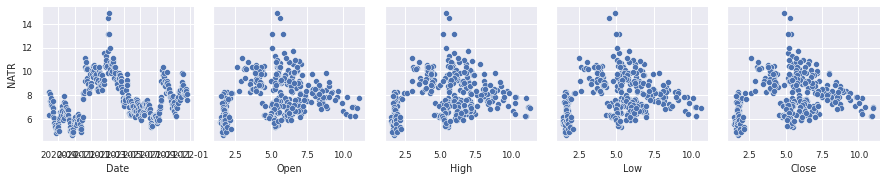

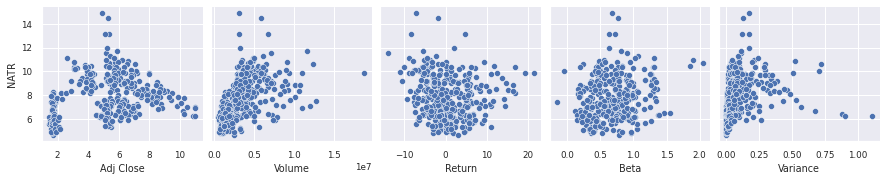

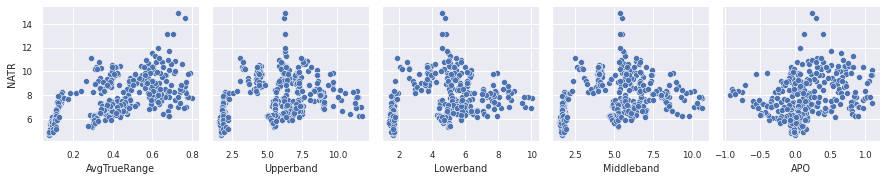

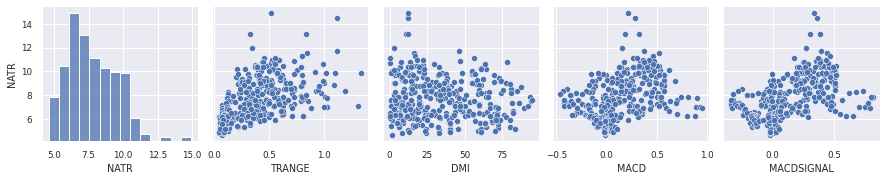

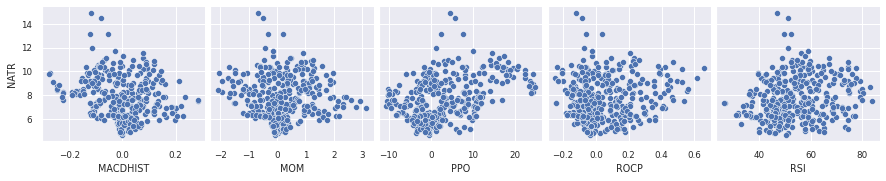

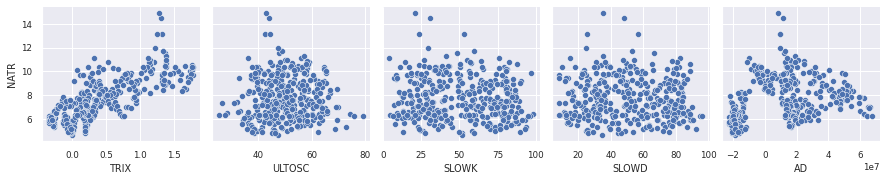

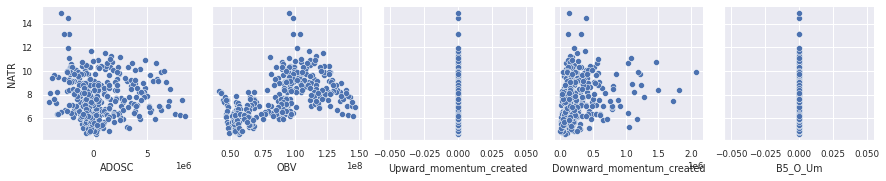

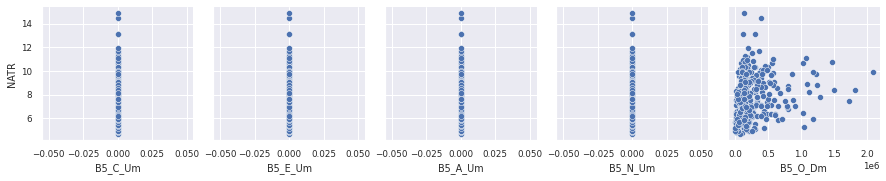

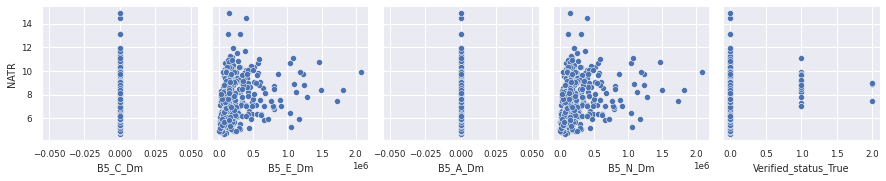

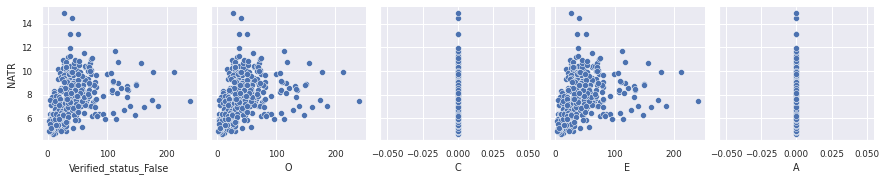

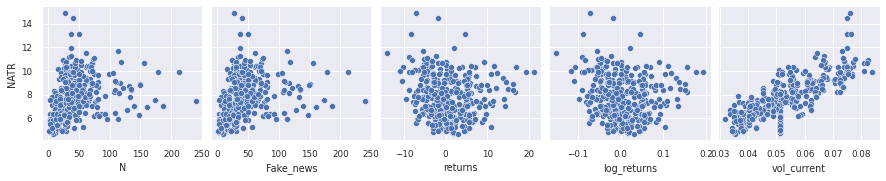

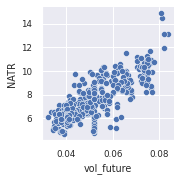

In [2891]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['NATR'])

In [2892]:
df.dtypes

Date                         datetime64[ns]
Open                                float64
High                                float64
Low                                 float64
Close                               float64
Adj Close                           float64
Volume                                int64
Return                              float64
Beta                                float64
Variance                            float64
AvgTrueRange                        float64
Upperband                           float64
Lowerband                           float64
Middleband                          float64
APO                                 float64
NATR                                float64
TRANGE                              float64
DMI                                 float64
MACD                                float64
MACDSIGNAL                          float64
MACDHIST                            float64
MOM                                 float64
PPO                             

In [2893]:
df.isnull().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Adj Close                    0
Volume                       0
Return                       0
Beta                         0
Variance                     0
AvgTrueRange                 0
Upperband                    0
Lowerband                    0
Middleband                   0
APO                          0
NATR                         0
TRANGE                       0
DMI                          0
MACD                         0
MACDSIGNAL                   0
MACDHIST                     0
MOM                          0
PPO                          0
ROCP                         0
RSI                          0
TRIX                         0
ULTOSC                       0
SLOWK                        0
SLOWD                        0
AD                           0
ADOSC                        0
OBV                          0
Upward_m

In [2894]:
df.fillna(0, inplace = True)

In [2895]:
df.dropna(inplace=True)

In [2896]:
sns.set(font_scale=0.8)

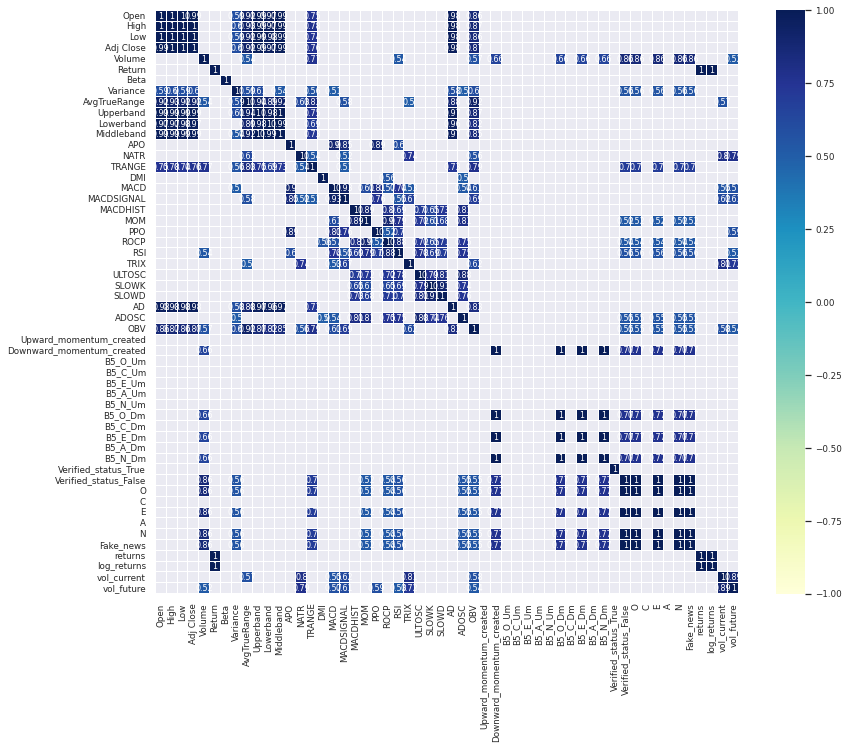

In [2897]:
corr = df.drop('Close', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [2898]:
df.describe()

Open        High         Low  ...  log_returns  vol_current  vol_future
count  355.000000  355.000000  355.000000  ...   355.000000   355.000000  355.000000
mean     5.001296    5.187099    4.795099  ...     0.003916     0.053155    0.053538
std      2.408832    2.499173    2.309760  ...     0.053035     0.012535    0.012248
min      1.450000    1.530000    1.420000  ...    -0.150552     0.031915    0.031915
25%      2.170000    2.255000    2.050000  ...    -0.031467     0.041820    0.042781
50%      5.360000    5.540000    5.160000  ...     0.000000     0.051194    0.051734
75%      6.495000    6.815000    6.255000  ...     0.036124     0.062248    0.062248
max     11.100000   11.390000   10.680000  ...     0.192963     0.083973    0.083973

[8 rows x 55 columns]

In [2899]:
# DROPPING ALL NaN VALUES
df.dropna(inplace=True)

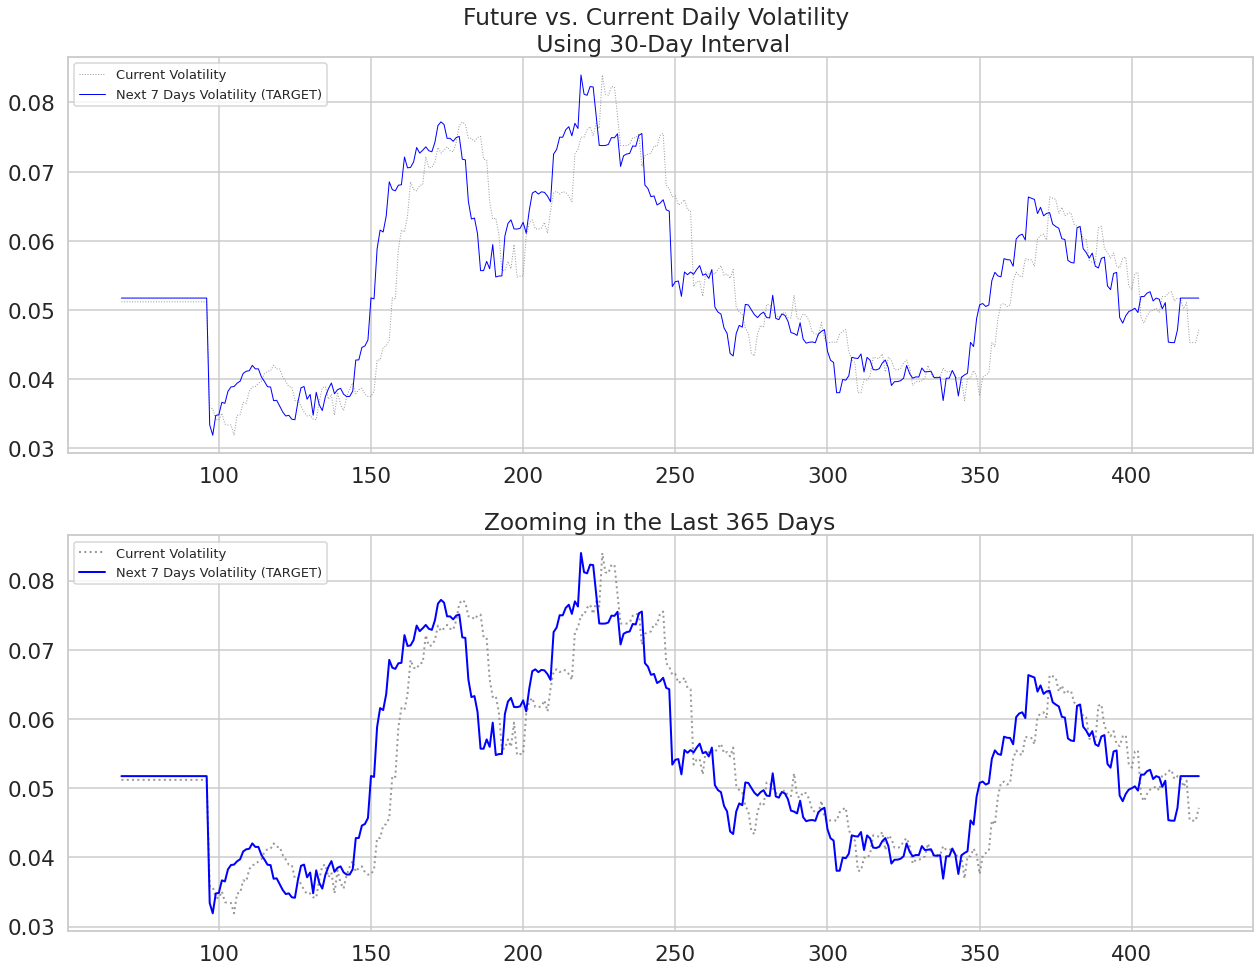

In [2900]:
n_zoom = 365
sns.set_context("talk", font_scale=1.3)
# plt.style.use(['seaborn'])

# VISUALIZE REALIZED CURRENT VS. FUTURE VOLATILITY
with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,14))

    ax1.plot(df.vol_current, alpha=.8, lw=1, color='gray', ls=':',
            label='Current Volatility')
    ax1.plot(df.vol_future, lw=1, color='blue',
            label=f'Next {n_future} Days Volatility (TARGET)')

    ax2.plot(df.vol_current[-n_zoom:], alpha=.8, lw=2, color='gray', ls=':',
            label='Current Volatility')
    ax2.plot(df.vol_future[-n_zoom:], lw=2, color='blue',
            label=f'Next {n_future} Days Volatility (TARGET)')

    ax1.title.set_text(f'Future vs. Current Daily Volatility \n Using {INTERVAL_WINDOW}-Day Interval')
    ax2.title.set_text(f'Zooming in the Last {n_zoom} Days')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
    plt.tight_layout()
    
    plt.show();

### **Daily Volatility Distribution**

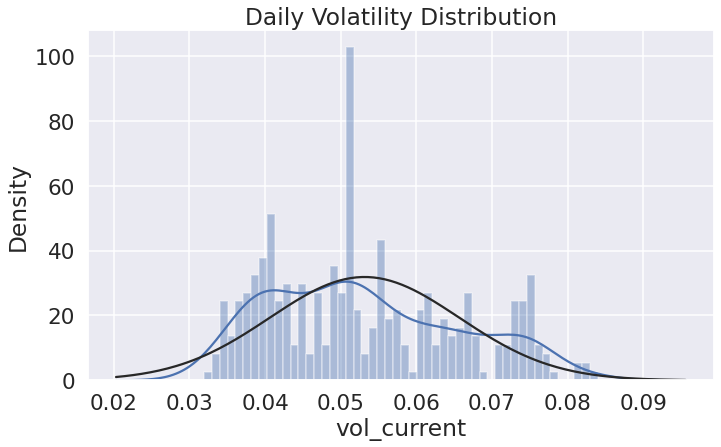

In [2901]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(df.vol_current, norm_hist=True, fit=stats.norm,
                bins=50, ax=ax)
    plt.title('Daily Volatility Distribution')
    
    plt.show();

Comparison for generalisability

In [2902]:
dfcorr_daily = pd.concat([df_AvgTrueRange['index'], df_NATR['index'], df_TRANGE['index'],
                      df_O['index'], df_C['index'], df_E['index'], df_A['index'], df_N['index'],
                      df_B5_O_Um['index'], df_B5_C_Um['index'], df_B5_E_Um['index'], df_B5_A_Um['index'], df_B5_N_Um['index'],
                      df_B5_O_Dm['index'], df_B5_C_Dm['index'], df_B5_E_Dm['index'], df_B5_A_Dm['index'], df_B5_N_Dm['index'],
                      df_Fake_news['index'], df_Upward_momentum_created['index'], df_Downward_momentum_created['index'],
                      df_Verified_status_True['index'], df_Verified_status_False['index'],
                    ], axis=1)

In [2903]:
dfcorr_daily.to_csv('daily_corr_'+ w.value +'.csv')


Experiment 2: weekly granularity

In [2904]:
if(w.value == 'AAPL'):
  df = pd.read_csv('/content/Final_AAPL.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'ABUS'):
  df = pd.read_csv('/content/Final_ABUS.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'ARDS'):
  df = pd.read_csv('/content/Final_ARDS.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'BABA'):
  df = pd.read_csv('/content/Final_BABA.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'BFRI'):
  df = pd.read_csv('/content/Final_BFRI.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'FB'):
  df = pd.read_csv('/content/Final_FB.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'GME'):
  df = pd.read_csv('/content/Final_GME.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'MCD'):
  df = pd.read_csv('/content/Final_MCD.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'PFE'):
  df = pd.read_csv('/content/Final_PFE.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'PLUG'):
  df = pd.read_csv('/content/Final_PLUG.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'QCOM'):
  df = pd.read_csv('/content/Final_QCOM.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'SENS'):
  df = pd.read_csv('/content/Final_SENS.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'TSLA'):
  df = pd.read_csv('/content/Final_TSLA.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'TWTR'):
  df = pd.read_csv('/content/Final_TWTR.csv', parse_dates=['Date'], index_col=['Date'])
if(w.value == 'UUUU'):
  df = pd.read_csv('/content/Final_UUUU.csv', parse_dates=['Date'], index_col=['Date'])

In [2905]:
df.columns

Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Return', 'Beta', 'Variance', 'AvgTrueRange', 'Upperband', 'Lowerband',
       'Middleband', 'APO', 'NATR', 'TRANGE', 'DMI', 'MACD', 'MACDSIGNAL',
       'MACDHIST', 'MOM', 'PPO', 'ROCP', 'RSI', 'TRIX', 'ULTOSC', 'SLOWK',
       'SLOWD', 'AD', 'ADOSC', 'OBV', 'Upward_momentum_created',
       'Downward_momentum_created', 'B5_O_Um', 'B5_C_Um', 'B5_E_Um', 'B5_A_Um',
       'B5_N_Um', 'B5_O_Dm', 'B5_C_Dm', 'B5_E_Dm', 'B5_A_Dm', 'B5_N_Dm',
       'Verified_status_True', 'Verified_status_False', 'O', 'C', 'E', 'A',
       'N', 'Real_or_Fake_tweet'],
      dtype='object')

In [2906]:
df.shape

(423, 52)

In [2907]:
df.isnull().sum()

Unnamed: 0                    0
Open                          0
High                          0
Low                           0
Close                         0
Adj Close                     0
Volume                        0
Return                        0
Beta                          0
Variance                      0
AvgTrueRange                  0
Upperband                     0
Lowerband                     0
Middleband                    0
APO                           5
NATR                          0
TRANGE                        0
DMI                           0
MACD                         13
MACDSIGNAL                   13
MACDHIST                     13
MOM                           0
PPO                           5
ROCP                          0
RSI                           0
TRIX                         68
ULTOSC                        8
SLOWK                         0
SLOWD                         0
AD                            0
ADOSC                         0
OBV     

In [2908]:
df = df.fillna(df.median())
del df['Unnamed: 0']
df.rename(columns = {'Real_or_Fake_tweet': 'Fake_news'}, inplace = True)

In [2909]:
df_weekly = df.resample('W').agg('mean')

In [2910]:
df_weekly.shape

(88, 51)

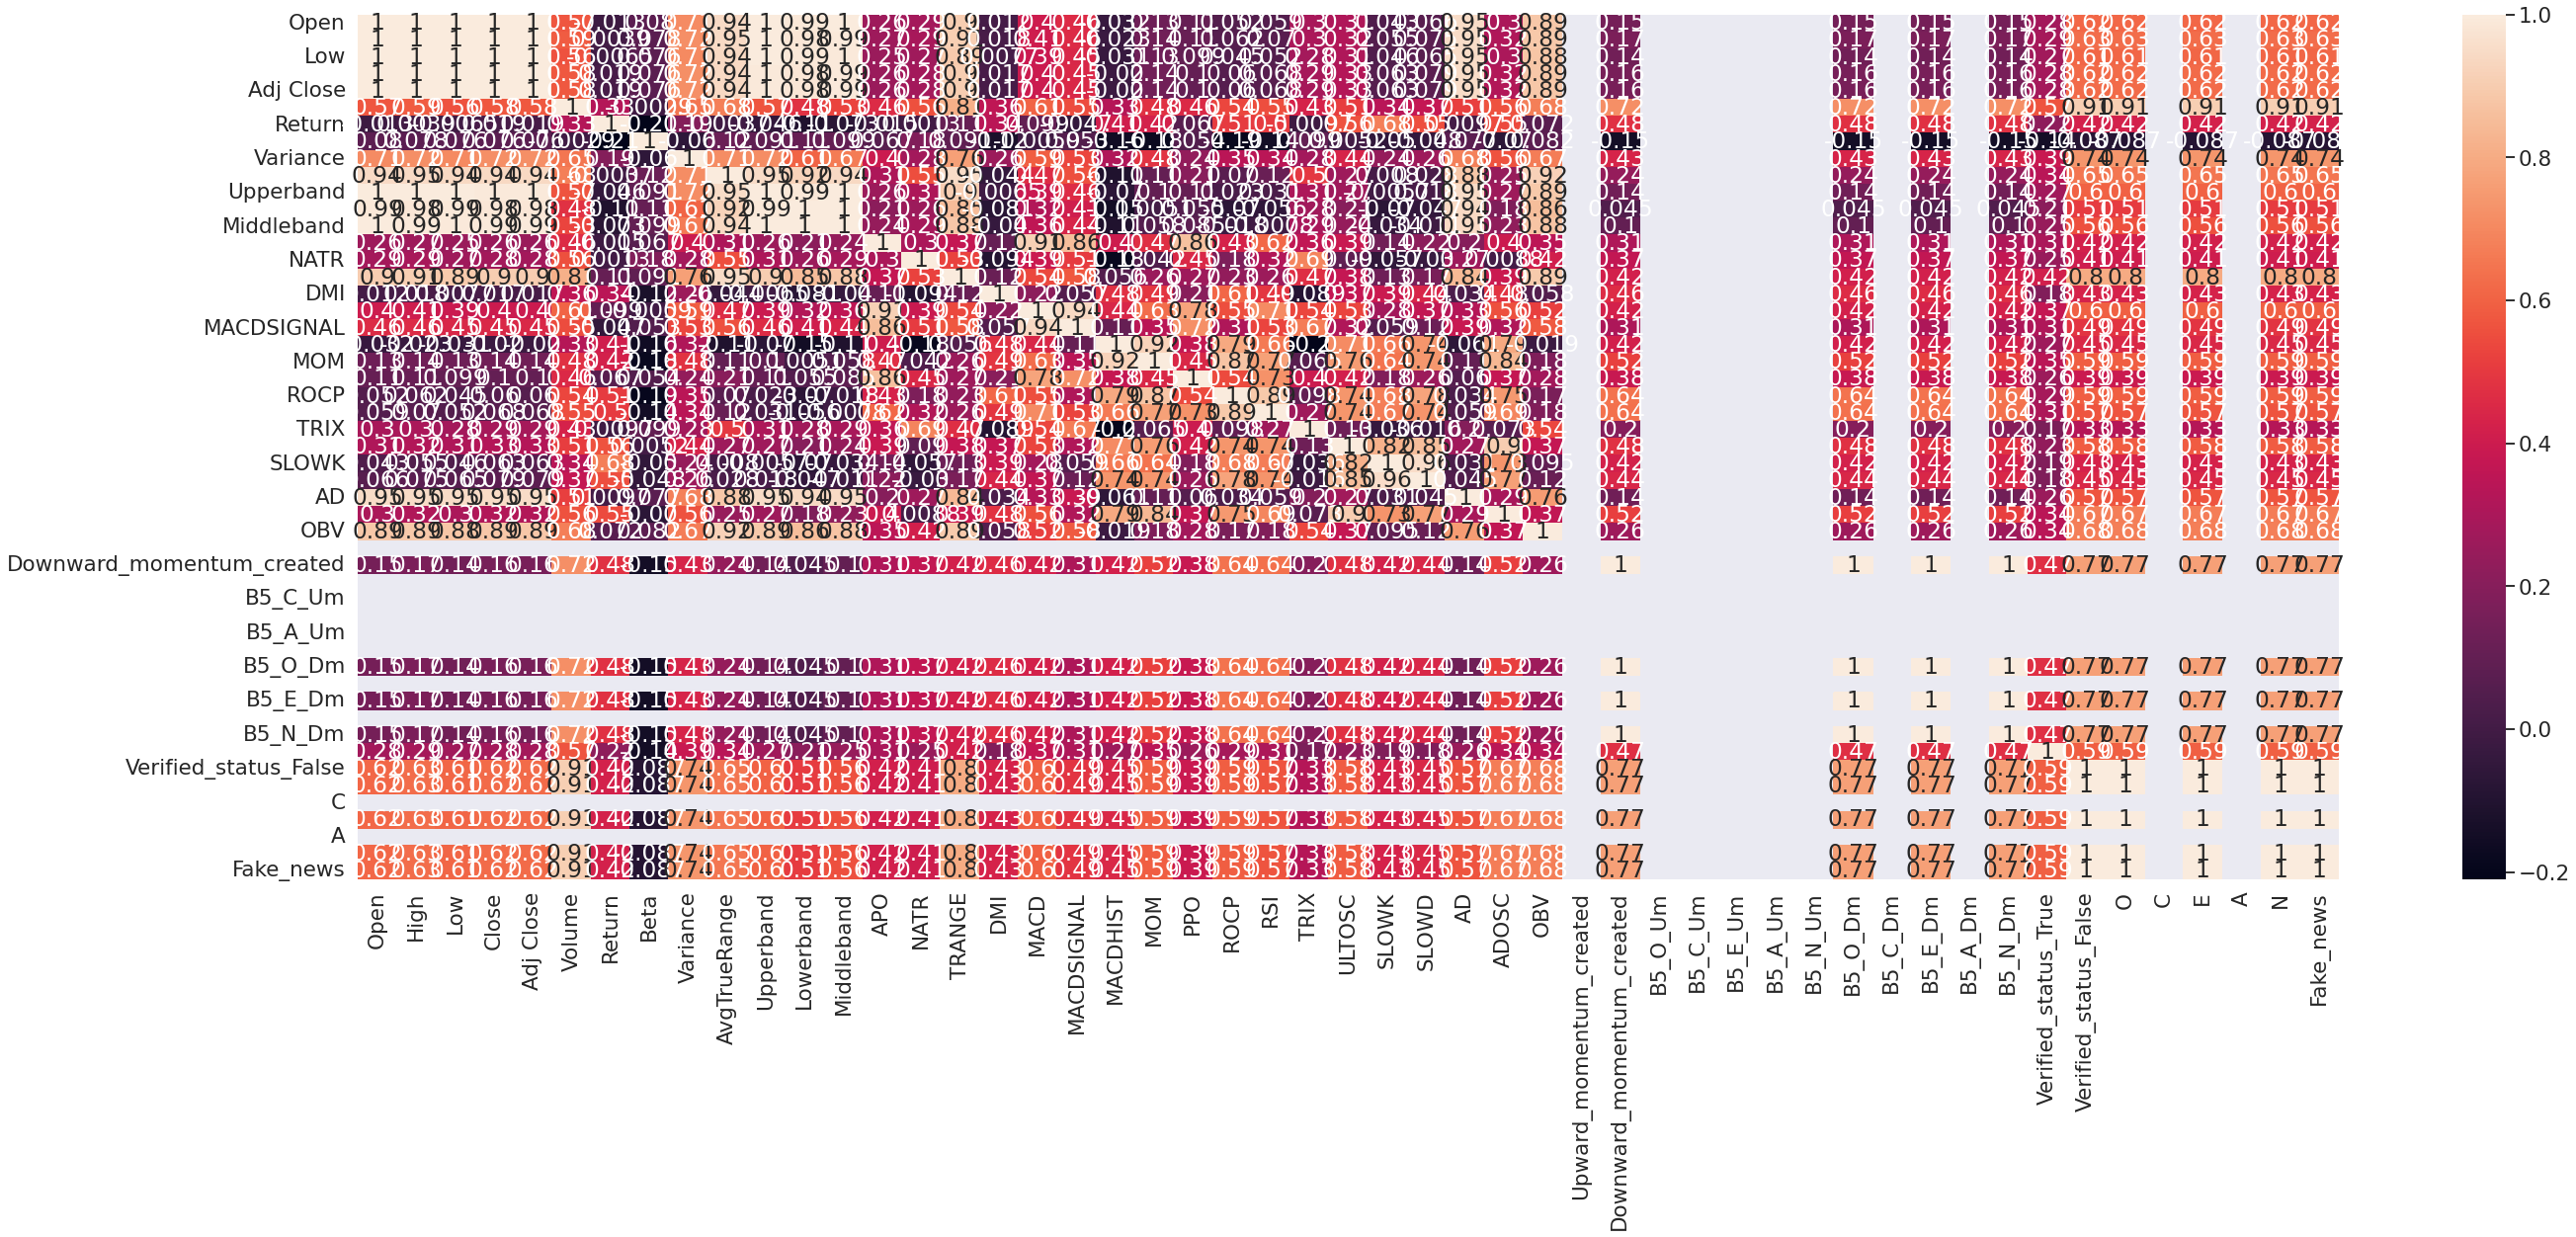

In [2911]:
plt.figure(figsize=(40,15))
sns.heatmap(df_weekly.corr(),annot=True)

In [2912]:
sns.set(font_scale=0.8)

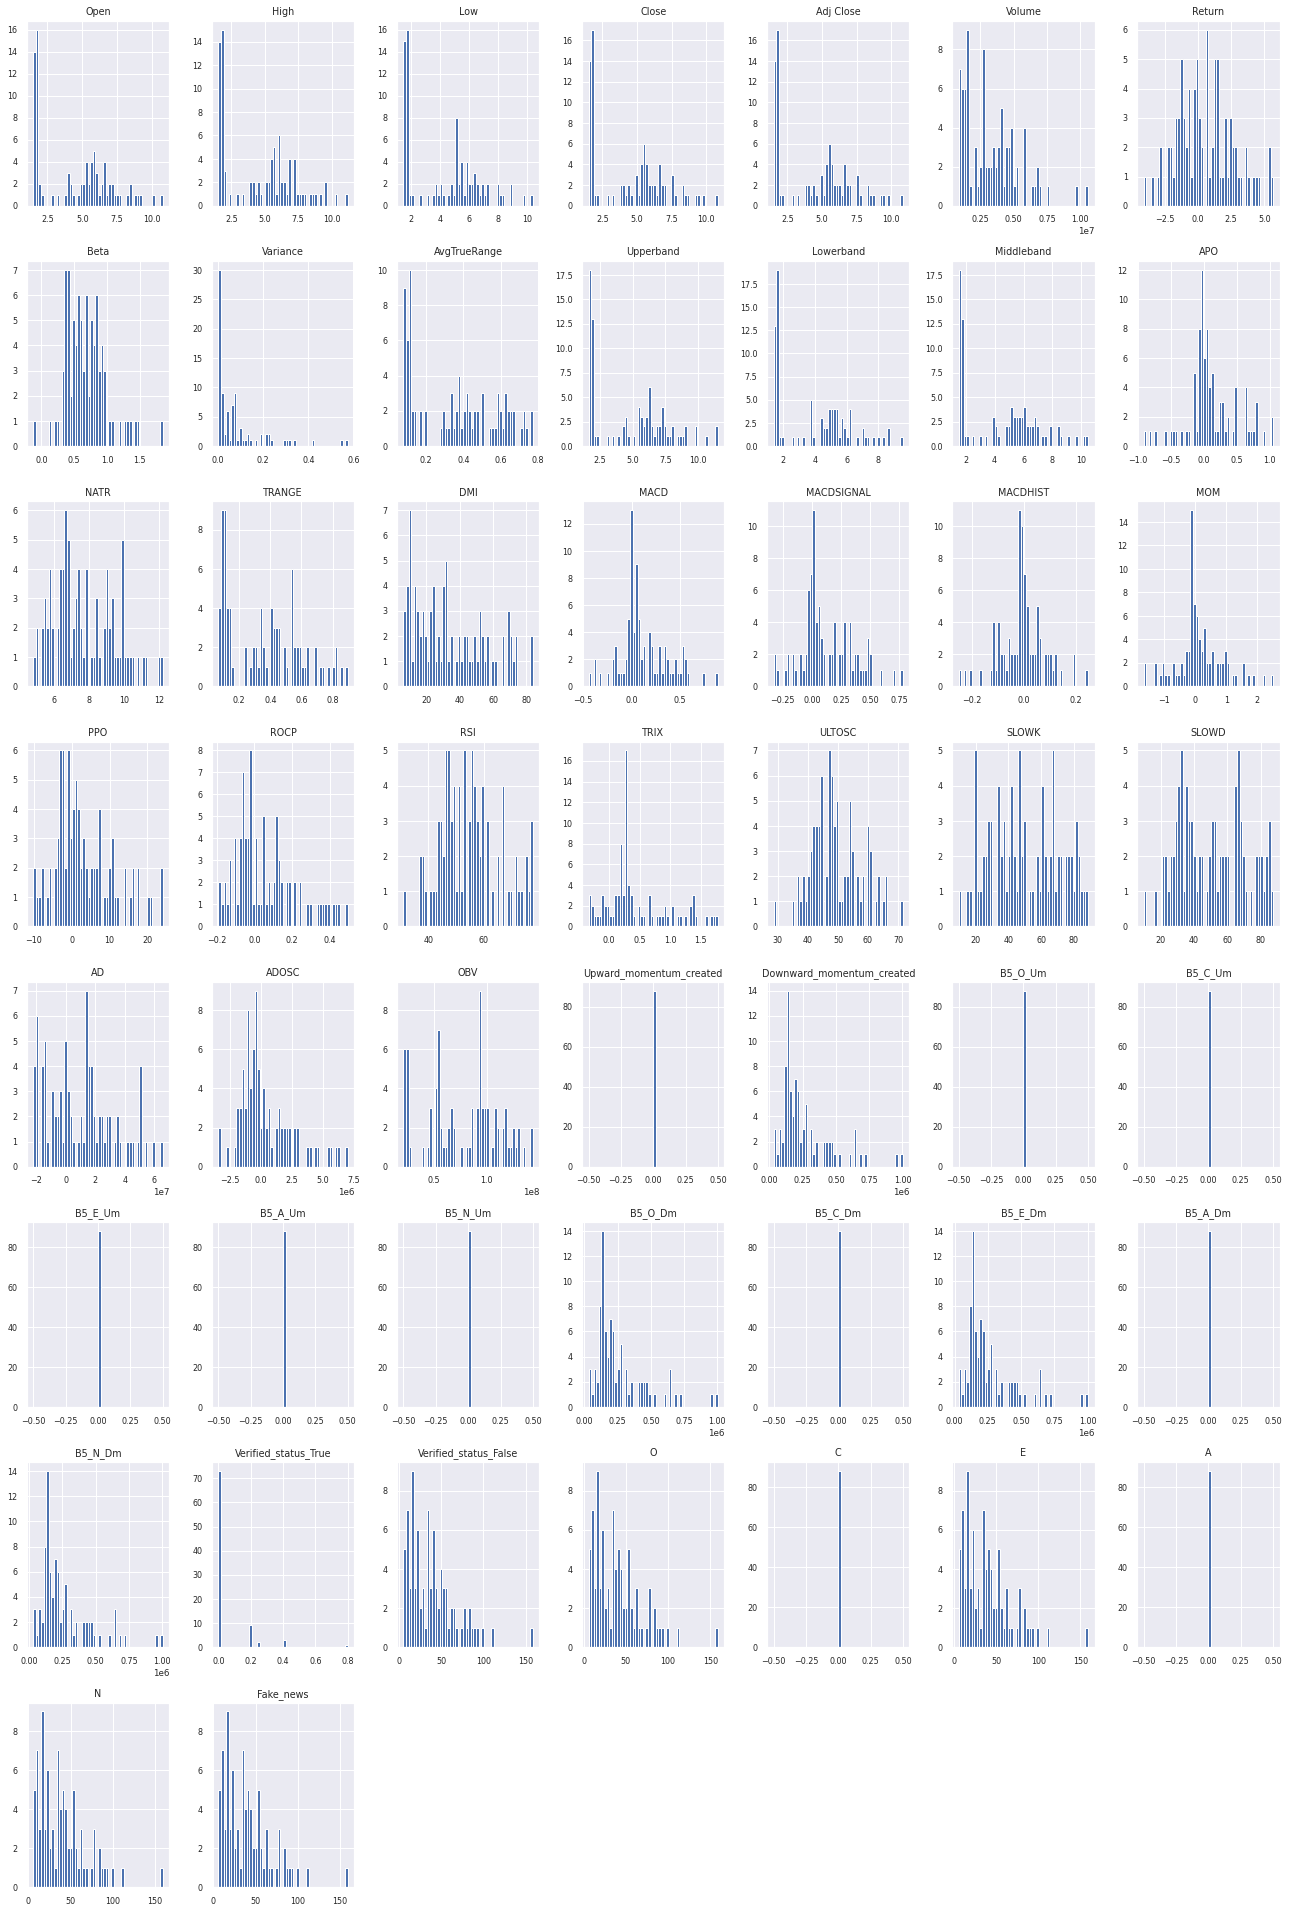

In [2913]:
df_weekly.hist(figsize=(20, 32), bins=50, xlabelsize=8, ylabelsize=8);

In [2914]:
df_corr = df_weekly.corr()['AvgTrueRange'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with AvgTrueRange:\n{}".format(len(golden_features_list), golden_features_list))

There are 21 strongly correlated values with AvgTrueRange:
AvgTrueRange             1.000000
Upperband                0.952269
TRANGE                   0.950027
High                     0.947696
Open                     0.944106
Middleband               0.942305
Adj Close                0.942235
Close                    0.942235
Low                      0.938861
Lowerband                0.923092
OBV                      0.915611
AD                       0.882620
Variance                 0.713967
Volume                   0.677870
Verified_status_False    0.654382
N                        0.654164
O                        0.654164
E                        0.654164
Fake_news                0.654164
MACDSIGNAL               0.558486
NATR                     0.551616
Name: AvgTrueRange, dtype: float64


In [2915]:
dfW_AvgTrueRange = golden_features_list.to_frame().reset_index()

In [2916]:
df_corr = df_weekly.corr()['NATR'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with NATR :\n{}".format(len(golden_features_list), golden_features_list))

There are 6 strongly correlated values with NATR :
NATR            1.000000
TRIX            0.690125
Volume          0.558921
AvgTrueRange    0.551616
TRANGE          0.525254
MACDSIGNAL      0.505915
Name: NATR, dtype: float64


In [2917]:
dfW_NATR = golden_features_list.to_frame().reset_index()

In [2918]:
df_corr = df_weekly.corr()['TRANGE'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with TRANGE:\n{}".format(len(golden_features_list), golden_features_list))

There are 22 strongly correlated values with TRANGE:
TRANGE                   1.000000
AvgTrueRange             0.950027
High                     0.909469
Open                     0.901281
Upperband                0.901145
Close                    0.901005
Adj Close                0.901005
OBV                      0.893845
Low                      0.892724
Middleband               0.881967
Lowerband                0.851703
AD                       0.843035
Volume                   0.814197
Verified_status_False    0.799342
N                        0.799086
O                        0.799086
E                        0.799086
Fake_news                0.799086
Variance                 0.764564
MACDSIGNAL               0.577707
MACD                     0.540180
NATR                     0.525254
Name: TRANGE, dtype: float64


In [2919]:
dfW_TRANGE = golden_features_list.to_frame().reset_index()

In [2920]:
df_corr = df_weekly.corr()['O'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Openness:\n{}".format(len(golden_features_list), golden_features_list))

There are 30 strongly correlated values with Openness:
Fake_news                    1.000000
E                            1.000000
O                            1.000000
N                            1.000000
Verified_status_False        0.999993
Volume                       0.908179
TRANGE                       0.799086
B5_O_Dm                      0.767979
Downward_momentum_created    0.767979
B5_E_Dm                      0.767979
B5_N_Dm                      0.767979
Variance                     0.738207
OBV                          0.678026
ADOSC                        0.671945
AvgTrueRange                 0.654164
High                         0.630479
Close                        0.624398
Adj Close                    0.624398
Open                         0.616380
Low                          0.608328
Upperband                    0.600490
MACD                         0.596325
Verified_status_True         0.593649
ROCP                         0.591636
MOM                          0.58

In [2921]:
dfW_O = golden_features_list.to_frame().reset_index()

In [2922]:
df_corr = df_weekly.corr()['C'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with conscientiousness:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with conscientiousness:
Series([], Name: C, dtype: float64)


In [2923]:
dfW_C = golden_features_list.to_frame().reset_index()

In [2924]:
df_corr = df_weekly.corr()['E'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with conscientiousness:\n{}".format(len(golden_features_list), golden_features_list))

There are 30 strongly correlated values with conscientiousness:
Fake_news                    1.000000
E                            1.000000
O                            1.000000
N                            1.000000
Verified_status_False        0.999993
Volume                       0.908179
TRANGE                       0.799086
B5_O_Dm                      0.767979
Downward_momentum_created    0.767979
B5_E_Dm                      0.767979
B5_N_Dm                      0.767979
Variance                     0.738207
OBV                          0.678026
ADOSC                        0.671945
AvgTrueRange                 0.654164
High                         0.630479
Close                        0.624398
Adj Close                    0.624398
Open                         0.616380
Low                          0.608328
Upperband                    0.600490
MACD                         0.596325
Verified_status_True         0.593649
ROCP                         0.591636
MOM                     

In [2925]:
dfW_E = golden_features_list.to_frame().reset_index()

In [2926]:
df_corr = df_weekly.corr()['A'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with conscientiousness:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with conscientiousness:
Series([], Name: A, dtype: float64)


In [2927]:
dfW_A = golden_features_list.to_frame().reset_index()

In [2928]:
df_corr = df_weekly.corr()['N'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with conscientiousness:\n{}".format(len(golden_features_list), golden_features_list))

There are 30 strongly correlated values with conscientiousness:
Fake_news                    1.000000
E                            1.000000
O                            1.000000
N                            1.000000
Verified_status_False        0.999993
Volume                       0.908179
TRANGE                       0.799086
B5_O_Dm                      0.767979
Downward_momentum_created    0.767979
B5_E_Dm                      0.767979
B5_N_Dm                      0.767979
Variance                     0.738207
OBV                          0.678026
ADOSC                        0.671945
AvgTrueRange                 0.654164
High                         0.630479
Close                        0.624398
Adj Close                    0.624398
Open                         0.616380
Low                          0.608328
Upperband                    0.600490
MACD                         0.596325
Verified_status_True         0.593649
ROCP                         0.591636
MOM                     

In [2929]:
dfW_N = golden_features_list.to_frame().reset_index()

In [2930]:
df_corr = df_weekly.corr()['B5_O_Um'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_O_Um:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_O_Um:
Series([], Name: B5_O_Um, dtype: float64)


In [2931]:
dfW_B5_O_Um = golden_features_list.to_frame().reset_index()

In [2932]:
df_corr = df_weekly.corr()['B5_C_Um'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_C_Um:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_C_Um:
Series([], Name: B5_C_Um, dtype: float64)


In [2933]:
dfW_B5_C_Um = golden_features_list.to_frame().reset_index()

In [2934]:
df_corr = df_weekly.corr()['B5_E_Um'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_E_Um:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_E_Um:
Series([], Name: B5_E_Um, dtype: float64)


In [2935]:
dfW_B5_E_Um = golden_features_list.to_frame().reset_index()

In [2936]:
df_corr = df_weekly.corr()['B5_A_Um'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_A_Um:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_A_Um:
Series([], Name: B5_A_Um, dtype: float64)


In [2937]:
dfW_B5_A_Um = golden_features_list.to_frame().reset_index()

In [2938]:
df_corr = df_weekly.corr()['B5_N_Um'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_N_Um:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_N_Um:
Series([], Name: B5_N_Um, dtype: float64)


In [2939]:
dfW_B5_N_Um = golden_features_list.to_frame().reset_index()

Downward momentum correlation


In [2940]:
df_corr = df_weekly.corr()['B5_O_Dm'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_O_Dm:\n{}".format(len(golden_features_list), golden_features_list))

There are 14 strongly correlated values with B5_O_Dm:
B5_N_Dm                      1.000000
B5_E_Dm                      1.000000
B5_O_Dm                      1.000000
Downward_momentum_created    1.000000
Fake_news                    0.767979
N                            0.767979
E                            0.767979
O                            0.767979
Verified_status_False        0.767897
Volume                       0.719435
ROCP                         0.644368
RSI                          0.637284
MOM                          0.519692
ADOSC                        0.516177
Name: B5_O_Dm, dtype: float64


In [2941]:
dfW_B5_O_Dm = golden_features_list.to_frame().reset_index()

In [2942]:
df_corr = df_weekly.corr()['B5_C_Dm'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_C_Dm:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_C_Dm:
Series([], Name: B5_C_Dm, dtype: float64)


In [2943]:
dfW_B5_C_Dm = golden_features_list.to_frame().reset_index()

In [2944]:
df_corr = df_weekly.corr()['B5_E_Dm'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_E_Dm:\n{}".format(len(golden_features_list), golden_features_list))

There are 14 strongly correlated values with B5_E_Dm:
B5_N_Dm                      1.000000
B5_E_Dm                      1.000000
B5_O_Dm                      1.000000
Downward_momentum_created    1.000000
Fake_news                    0.767979
N                            0.767979
E                            0.767979
O                            0.767979
Verified_status_False        0.767897
Volume                       0.719435
ROCP                         0.644368
RSI                          0.637284
MOM                          0.519692
ADOSC                        0.516177
Name: B5_E_Dm, dtype: float64


In [2945]:
dfW_B5_E_Dm = golden_features_list.to_frame().reset_index()

In [2946]:
df_corr = df_weekly.corr()['B5_A_Dm'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_A_Dm:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with B5_A_Dm:
Series([], Name: B5_A_Dm, dtype: float64)


In [2947]:
dfW_B5_A_Dm= golden_features_list.to_frame().reset_index()

In [2948]:
df_corr = df_weekly.corr()['B5_N_Dm'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with B5_N_Dm:\n{}".format(len(golden_features_list), golden_features_list))

There are 14 strongly correlated values with B5_N_Dm:
B5_N_Dm                      1.000000
B5_E_Dm                      1.000000
B5_O_Dm                      1.000000
Downward_momentum_created    1.000000
Fake_news                    0.767979
N                            0.767979
E                            0.767979
O                            0.767979
Verified_status_False        0.767897
Volume                       0.719435
ROCP                         0.644368
RSI                          0.637284
MOM                          0.519692
ADOSC                        0.516177
Name: B5_N_Dm, dtype: float64


In [2949]:
dfW_B5_N_Dm = golden_features_list.to_frame().reset_index()

In [2950]:
df_corr = df_weekly.corr()['Fake_news'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Real_or_Fake_tweet :\n{}".format(len(golden_features_list), golden_features_list))

There are 30 strongly correlated values with Real_or_Fake_tweet :
Fake_news                    1.000000
E                            1.000000
O                            1.000000
N                            1.000000
Verified_status_False        0.999993
Volume                       0.908179
TRANGE                       0.799086
B5_O_Dm                      0.767979
Downward_momentum_created    0.767979
B5_E_Dm                      0.767979
B5_N_Dm                      0.767979
Variance                     0.738207
OBV                          0.678026
ADOSC                        0.671945
AvgTrueRange                 0.654164
High                         0.630479
Close                        0.624398
Adj Close                    0.624398
Open                         0.616380
Low                          0.608328
Upperband                    0.600490
MACD                         0.596325
Verified_status_True         0.593649
ROCP                         0.591636
MOM                   

In [2951]:
dfW_Fake_news = golden_features_list.to_frame().reset_index()

In [2952]:
df_corr = df_weekly.corr()['Downward_momentum_created'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Downward_momentum_created :\n{}".format(len(golden_features_list), golden_features_list))

There are 14 strongly correlated values with Downward_momentum_created :
B5_N_Dm                      1.000000
B5_E_Dm                      1.000000
B5_O_Dm                      1.000000
Downward_momentum_created    1.000000
Fake_news                    0.767979
N                            0.767979
E                            0.767979
O                            0.767979
Verified_status_False        0.767897
Volume                       0.719435
ROCP                         0.644368
RSI                          0.637284
MOM                          0.519692
ADOSC                        0.516177
Name: Downward_momentum_created, dtype: float64


In [2953]:
dfW_Downward_momentum_created = golden_features_list.to_frame().reset_index()

In [2954]:
df_corr = df_weekly.corr()['Upward_momentum_created'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Upward_momentum_created :\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with Upward_momentum_created :
Series([], Name: Upward_momentum_created, dtype: float64)


In [2955]:
dfW_Upward_momentum_created = golden_features_list.to_frame().reset_index()

In [2956]:
df_corr = df_weekly.corr()['Verified_status_True'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Verified_status_True :\n{}".format(len(golden_features_list), golden_features_list))

There are 7 strongly correlated values with Verified_status_True :
Verified_status_True     1.000000
Fake_news                0.593649
N                        0.593649
E                        0.593649
O                        0.593649
Verified_status_False    0.590710
Volume                   0.567377
Name: Verified_status_True, dtype: float64


In [2957]:
dfW_Verified_status_True = golden_features_list.to_frame().reset_index()

In [2958]:
df_corr = df_weekly.corr()['Verified_status_False'] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Verified_status_False :\n{}".format(len(golden_features_list), golden_features_list))

There are 30 strongly correlated values with Verified_status_False :
Verified_status_False        1.000000
Fake_news                    0.999993
E                            0.999993
O                            0.999993
N                            0.999993
Volume                       0.908045
TRANGE                       0.799342
B5_O_Dm                      0.767897
Downward_momentum_created    0.767897
B5_E_Dm                      0.767897
B5_N_Dm                      0.767897
Variance                     0.738429
OBV                          0.678310
ADOSC                        0.672192
AvgTrueRange                 0.654382
High                         0.630866
Close                        0.624787
Adj Close                    0.624787
Open                         0.616768
Low                          0.608722
Upperband                    0.600859
MACD                         0.596232
ROCP                         0.591908
Verified_status_True         0.590710
MOM                

In [2959]:
dfW_Verified_status_False = golden_features_list.to_frame().reset_index()

In [2960]:
sns.set(font_scale=0.8)

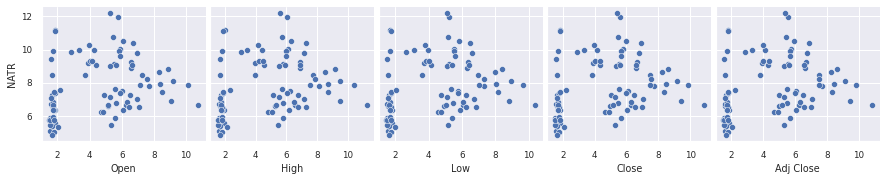

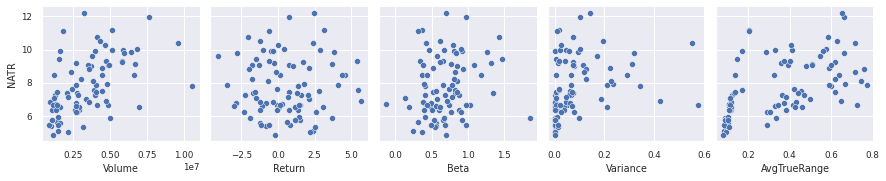

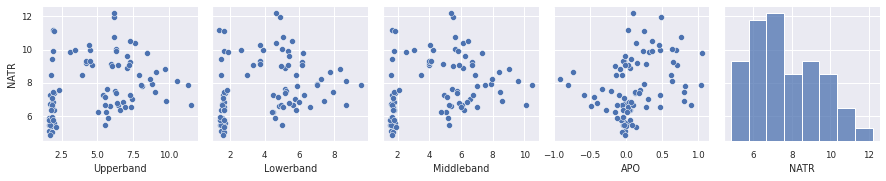

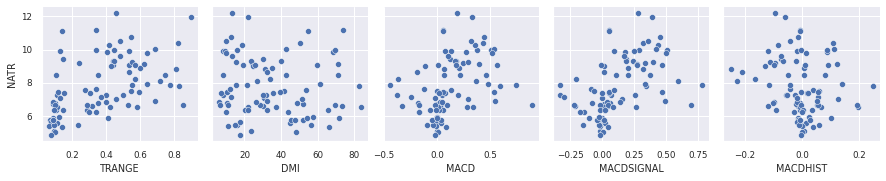

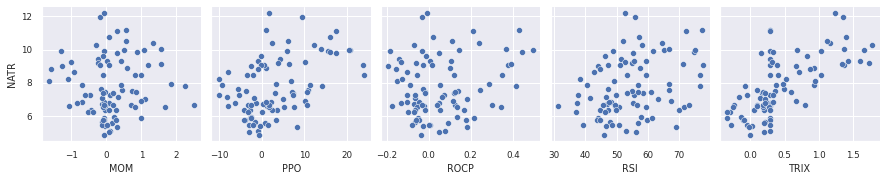

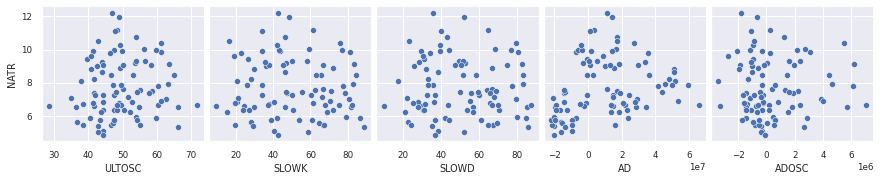

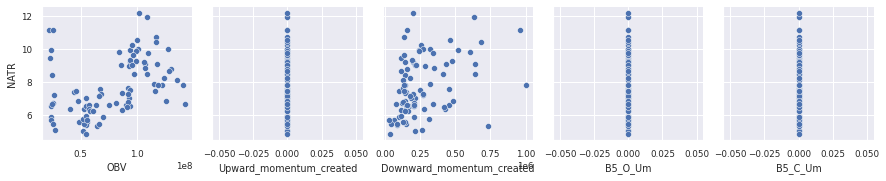

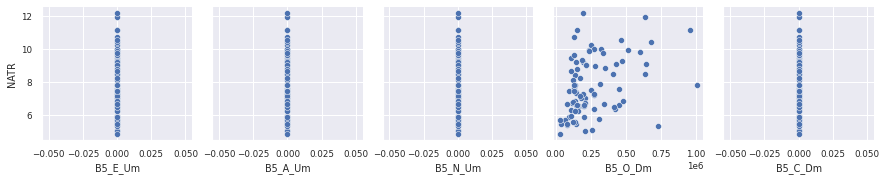

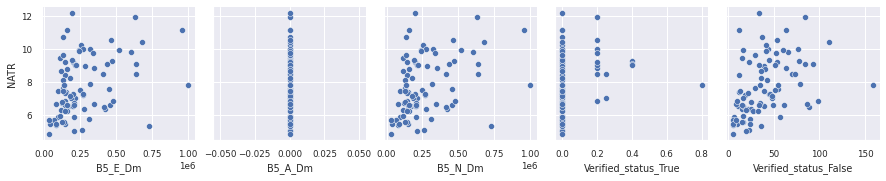

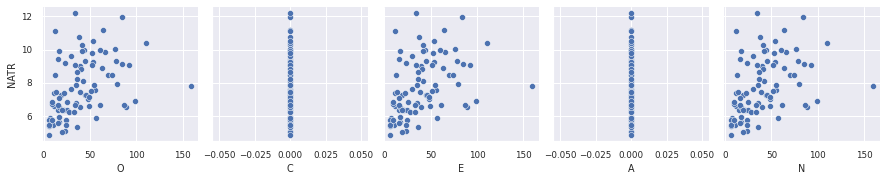

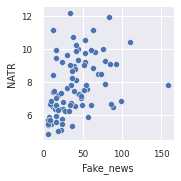

In [2961]:
for i in range(0, len(df_weekly.columns), 5):
    sns.pairplot(data=df_weekly,
                x_vars=df_weekly.columns[i:i+5],
                y_vars=['NATR'])

In [2962]:
df_weekly.fillna(0, inplace = True)

In [2963]:
df_weekly.dropna(inplace=True)

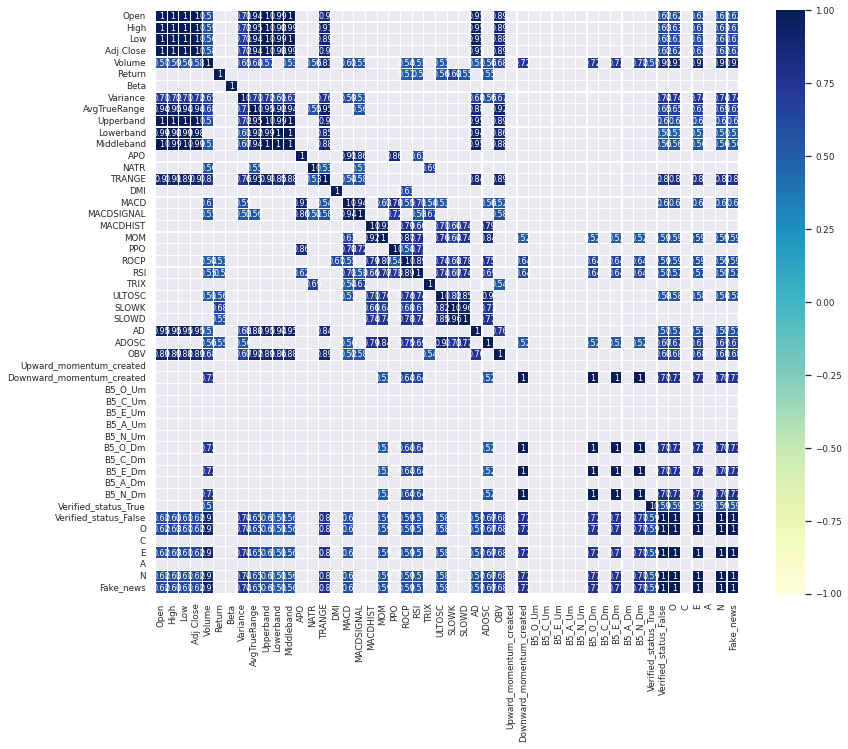

In [2964]:
corr = df_weekly.drop('Close', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Weekly volatility distribution

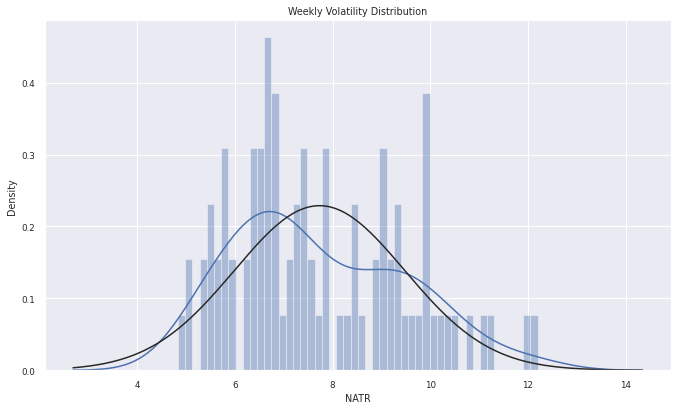

In [2965]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(df_weekly.NATR, norm_hist=True, fit=stats.norm,
                bins=50, ax=ax)
    plt.title('Weekly Volatility Distribution')
    
    plt.show();

In [2966]:
dfcorr_weekly = pd.concat([dfW_AvgTrueRange['index'], dfW_NATR['index'], dfW_TRANGE['index'],
                      dfW_O['index'], dfW_C['index'], dfW_E['index'], dfW_A['index'], dfW_N['index'],
                      dfW_B5_O_Um['index'], dfW_B5_C_Um['index'], dfW_B5_E_Um['index'], dfW_B5_A_Um['index'], dfW_B5_N_Um['index'],
                      dfW_B5_O_Dm['index'], dfW_B5_C_Dm['index'], dfW_B5_E_Dm['index'], dfW_B5_A_Dm['index'], dfW_B5_N_Dm['index'],
                      dfW_Fake_news['index'], dfW_Upward_momentum_created['index'], dfW_Downward_momentum_created['index'],
                      dfW_Verified_status_True['index'], dfW_Verified_status_False['index']
                    ], axis=1)

In [2967]:
dfcorr_weekly.to_csv('weekly_corr_'+w.value +'.csv')

Draw comparison: Please go to the Generalisation.ipynb file